# ResNet Model Building Pipeline for 1D Signals with DEMO
#### ResNet18, ResNet34, ResNet50, ResNet101, ResNet152

In [1]:
import socket
import tornado.iostream

# Create a TCP connection to a server running on localhost at port 8000
sock = socket.create_connection(('localhost', 8888))

# Create an IOStream object with a large buffer size
stream = tornado.iostream.IOStream(sock, max_buffer_size=1073741824)


In [2]:
import numpy as np
import pandas as pd
# import seaborn as sns
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam, RMSprop
# from tensorflow.keras.optimizers import AdamW
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import Normalizer,MinMaxScaler,StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
# sns.set_theme(style="whitegrid")
import pywt
np.set_printoptions(suppress=True)
# Import ResNet1D Module
from ResNet_1DCNN import ResNet

In [3]:
columns = ['Fx','Fy','Fz','Mx','My','Mz']
wavelet = 'db4'
max_iter = 50
iter = 0

# Walking Dataset
InsoleWalking1 = pd.read_csv('0310AyuRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking2 = pd.read_csv('0310HudaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking3 = pd.read_csv('0311LalaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking4 = pd.read_csv('0311YunitaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking5 = pd.read_csv('0312AbelRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking6 = pd.read_csv('0312AbiRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking7 = pd.read_csv('0312AryaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking8 = pd.read_csv('0312HawaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking9 = pd.read_csv('0312NisaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking10 = pd.read_csv('0313ChenChengRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking11 = pd.read_csv('0313RezaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking12 = pd.read_csv('0313RilaniRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking13 = pd.read_csv('0313SariRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking14 = pd.read_csv('0313ShelbyRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking15 = pd.read_csv('0314HelenRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking16 = pd.read_csv('0315AyuRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking17 = pd.read_csv('0315HappyRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking18 = pd.read_csv('0317HeniRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking19 = pd.read_csv('0317NadiaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking20 = pd.read_csv('0317VikaRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking21 = pd.read_csv('0319AlfianRWalk5Min.txt', header=None, low_memory=False)
InsoleWalking22 = pd.read_csv('1225JakariaRWalk5Min.txt', header=None, low_memory=False)
SIDatasWalking1 =  np.array(InsoleWalking1)
SIDatasWalking2 =  np.array(InsoleWalking2)
SIDatasWalking3 =  np.array(InsoleWalking3)
SIDatasWalking4 =  np.array(InsoleWalking4)
SIDatasWalking5 =  np.array(InsoleWalking5)
SIDatasWalking6 =  np.array(InsoleWalking6)
SIDatasWalking7 =  np.array(InsoleWalking7)
SIDatasWalking8 =  np.array(InsoleWalking8)
SIDatasWalking9 =  np.array(InsoleWalking9)
SIDatasWalking10 =  np.array(InsoleWalking10)
SIDatasWalking11 =  np.array(InsoleWalking11)
SIDatasWalking12 =  np.array(InsoleWalking12)
SIDatasWalking13 =  np.array(InsoleWalking13)
SIDatasWalking14 =  np.array(InsoleWalking14)
SIDatasWalking15 =  np.array(InsoleWalking15)
SIDatasWalking16 =  np.array(InsoleWalking16)
SIDatasWalking17 =  np.array(InsoleWalking17)
SIDatasWalking18 =  np.array(InsoleWalking18)
SIDatasWalking19 =  np.array(InsoleWalking19)
SIDatasWalking20 =  np.array(InsoleWalking20)
SIDatasWalking21 =  np.array(InsoleWalking21)
SIDatasWalking22 =  np.array(InsoleWalking22)

dfwalk1 = pd.read_csv('0310AyuRWalk5Min.csv', low_memory=False)
dfwalk2 = pd.read_csv('0310HudaRWalk5Min.csv', low_memory=False)
dfwalk3 = pd.read_csv('0311LalaRWalk5Min.csv', low_memory=False)
dfwalk4 = pd.read_csv('0311YunitaRWalk5Min.csv', low_memory=False)
dfwalk5 = pd.read_csv('0312AbelRWalk5Min.csv', low_memory=False)
dfwalk6 = pd.read_csv('0312AbiRWalk5Min.csv', low_memory=False)
dfwalk7 = pd.read_csv('0312AryaRWalk5Min.csv', low_memory=False)
dfwalk8 = pd.read_csv('0312HawaRWalk5Min.csv', low_memory=False)
dfwalk9 = pd.read_csv('0312NisaRWalk5Min.csv', low_memory=False)
dfwalk10 = pd.read_csv('0313ChenChengRWalk5Min.csv', low_memory=False)
dfwalk11 = pd.read_csv('0313RezaRWalk5Min.csv', low_memory=False)
dfwalk12 = pd.read_csv('0313RilaniRWalk5Min.csv', low_memory=False)
dfwalk13 = pd.read_csv('0313SariRWalk5Min.csv', low_memory=False)
dfwalk14 = pd.read_csv('0313ShelbyRWalk5Min.csv', low_memory=False)
dfwalk15 = pd.read_csv('0314HelenRWalk5Min.csv', low_memory=False)
dfwalk16 = pd.read_csv('0315AyuRWalk5Min.csv', low_memory=False)
dfwalk17 = pd.read_csv('0315HappyRWalk5Min.csv', low_memory=False)
dfwalk18 = pd.read_csv('0317HeniRWalk5Min.csv', low_memory=False)
dfwalk19 = pd.read_csv('0317NadiaRWalk5Min.csv', low_memory=False)
dfwalk20 = pd.read_csv('0317VikaRWalk5Min.csv', low_memory=False)
dfwalk21 = pd.read_csv('0319AlfianRWalk5Min.csv', low_memory=False)
dfwalk22 = pd.read_csv('1225JakariaRWalk5Min.csv', low_memory=False)

selected_dfwalks1 = dfwalk1[columns]
selected_dfwalks2 = dfwalk2[columns]
selected_dfwalks3 = dfwalk3[columns]
selected_dfwalks4 = dfwalk4[columns]
selected_dfwalks5 = dfwalk5[columns]
selected_dfwalks6 = dfwalk6[columns]
selected_dfwalks7 = dfwalk7[columns]
selected_dfwalks8 = dfwalk8[columns]
selected_dfwalks9 = dfwalk9[columns]
selected_dfwalks10 = dfwalk10[columns]
selected_dfwalks11 = dfwalk11[columns]
selected_dfwalks12 = dfwalk12[columns]
selected_dfwalks13 = dfwalk13[columns]
selected_dfwalks14 = dfwalk14[columns]
selected_dfwalks15 = dfwalk15[columns]
selected_dfwalks16 = dfwalk16[columns]
selected_dfwalks17 = dfwalk17[columns]
selected_dfwalks18 = dfwalk18[columns]
selected_dfwalks19 = dfwalk19[columns]
selected_dfwalks20 = dfwalk20[columns]
selected_dfwalks21 = dfwalk21[columns]
selected_dfwalks22 = dfwalk22[columns]
FPDatasWalking1 = selected_dfwalks1[:15000]
FPDatasWalking2 = selected_dfwalks2[:15000]
FPDatasWalking3 = selected_dfwalks3[:15000]
FPDatasWalking4 = selected_dfwalks4[:15000]
FPDatasWalking5 = selected_dfwalks5[:15000]
FPDatasWalking6 = selected_dfwalks6[:15000]
FPDatasWalking7 = selected_dfwalks7[:15000]
FPDatasWalking8 = selected_dfwalks8[:15000]
FPDatasWalking9 = selected_dfwalks9[:15000]
FPDatasWalking10 = selected_dfwalks10[:15000]
FPDatasWalking11 = selected_dfwalks11[:15000]
FPDatasWalking12 = selected_dfwalks12[:15000]
FPDatasWalking13 = selected_dfwalks13[:15000]
FPDatasWalking14 = selected_dfwalks14[:15000]
FPDatasWalking15 = selected_dfwalks15[:15000]
FPDatasWalking16 = selected_dfwalks16[:15000]
FPDatasWalking17 = selected_dfwalks17[:15000]
FPDatasWalking18 = selected_dfwalks18[:15000]
FPDatasWalking19 = selected_dfwalks19[:15000]
FPDatasWalking20 = selected_dfwalks20[:15000]
FPDatasWalking21 = selected_dfwalks21[:15000]
FPDatasWalking22 = selected_dfwalks22[:15000]

SIDataWalking1 = np.array(SIDatasWalking1[:15000]).astype('float32')
SIDataWalking2 = np.array(SIDatasWalking2[:15000]).astype('float32')
SIDataWalking3 = np.array(SIDatasWalking3[:15000]).astype('float32')
SIDataWalking4 = np.array(SIDatasWalking4[:15000]).astype('float32')
SIDataWalking5 = np.array(SIDatasWalking5[:15000]).astype('float32')
SIDataWalking6 = np.array(SIDatasWalking6[:15000]).astype('float32')
SIDataWalking7 = np.array(SIDatasWalking7[:15000]).astype('float32')
SIDataWalking8 = np.array(SIDatasWalking8[:15000]).astype('float32')
SIDataWalking9 = np.array(SIDatasWalking9[:15000]).astype('float32')
SIDataWalking10 = np.array(SIDatasWalking10[:15000]).astype('float32')
SIDataWalking11 = np.array(SIDatasWalking11[:15000]).astype('float32')
SIDataWalking12 = np.array(SIDatasWalking12[:15000]).astype('float32')
SIDataWalking13 = np.array(SIDatasWalking13[:15000]).astype('float32')
SIDataWalking14 = np.array(SIDatasWalking14[:15000]).astype('float32')
SIDataWalking15 = np.array(SIDatasWalking15[:15000]).astype('float32')
SIDataWalking16 = np.array(SIDatasWalking16[:15000]).astype('float32')
SIDataWalking17 = np.array(SIDatasWalking17[:15000]).astype('float32')
SIDataWalking18 = np.array(SIDatasWalking18[:15000]).astype('float32')
SIDataWalking19 = np.array(SIDatasWalking19[:15000]).astype('float32')
SIDataWalking20 = np.array(SIDatasWalking20[:15000]).astype('float32')
SIDataWalking21 = np.array(SIDatasWalking21[:15000]).astype('float32')
SIDataWalking22 = np.array(SIDatasWalking22[:15000]).astype('float32')
FPDataWalking1 = np.array(FPDatasWalking1).astype('float32')
FPDataWalking2 = np.array(FPDatasWalking2).astype('float32')
FPDataWalking3= np.array(FPDatasWalking3).astype('float32')
FPDataWalking4= np.array(FPDatasWalking4).astype('float32')
FPDataWalking5= np.array(FPDatasWalking5).astype('float32')
FPDataWalking6= np.array(FPDatasWalking6).astype('float32')
FPDataWalking7= np.array(FPDatasWalking7).astype('float32')
FPDataWalking8= np.array(FPDatasWalking8).astype('float32')
FPDataWalking9= np.array(FPDatasWalking9).astype('float32')
FPDataWalking10 = np.array(FPDatasWalking10).astype('float32')
FPDataWalking11 = np.array(FPDatasWalking11).astype('float32')
FPDataWalking12= np.array(FPDatasWalking12).astype('float32')
FPDataWalking13= np.array(FPDatasWalking13).astype('float32')
FPDataWalking14= np.array(FPDatasWalking14).astype('float32')
FPDataWalking15= np.array(FPDatasWalking15).astype('float32')
FPDataWalking16= np.array(FPDatasWalking16).astype('float32')
FPDataWalking17= np.array(FPDatasWalking17).astype('float32')
FPDataWalking18= np.array(FPDatasWalking18).astype('float32')
FPDataWalking19= np.array(FPDatasWalking19).astype('float32')
FPDataWalking20= np.array(FPDatasWalking20).astype('float32')
FPDataWalking21= np.array(FPDatasWalking21).astype('float32')
FPDataWalking22= np.array(FPDatasWalking22).astype('float32')

SIDatasetWalking = np.concatenate((SIDataWalking1, SIDataWalking2, SIDataWalking3,
                            SIDataWalking4, SIDataWalking5, SIDataWalking6,
                            SIDataWalking7, SIDataWalking8, SIDataWalking9,
                            SIDataWalking10, SIDataWalking11, SIDataWalking12,
                            SIDataWalking13, SIDataWalking14, SIDataWalking15,
                            SIDataWalking16, SIDataWalking17, SIDataWalking18,
                            SIDataWalking19, SIDataWalking20, SIDataWalking21,
                            SIDataWalking22), axis=0)
                            
FPDatasetWalking = np.concatenate((FPDataWalking1, FPDataWalking2, FPDataWalking3,
                            FPDataWalking4, FPDataWalking5, FPDataWalking6,
                            FPDataWalking7, FPDataWalking8, FPDataWalking9,
                            FPDataWalking10, FPDataWalking11, FPDataWalking12,
                            FPDataWalking13, FPDataWalking14, FPDataWalking15,
                            FPDataWalking16, FPDataWalking17, FPDataWalking18,
                            FPDataWalking19, FPDataWalking20, FPDataWalking21,
                            FPDataWalking22), axis=0)

# SIDatasetWalking = SIDataWalking1
# FPDatasetWalking = FPDataWalking1

# SIDatasetWalking = np.array(SIDatasetWalking).astype('float64')
# FPDatasetWalking = np.array(FPDatasetWalking).astype('float64')

# Standing Dataset
InsoleStanding1 = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
InsoleStanding2 = pd.read_csv('0310HudaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding3 = pd.read_csv('0311LalaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding4 = pd.read_csv('0311YunitaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding5 = pd.read_csv('0312AbelStand5Min1.txt', header=None, low_memory=False)
InsoleStanding6 = pd.read_csv('0312AbiStand5Min1.txt', header=None, low_memory=False)
InsoleStanding7 = pd.read_csv('0312AryaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding8 = pd.read_csv('0312HawaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding9 = pd.read_csv('0312NisaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding10 = pd.read_csv('0313ChenChengStand5Min1.txt', header=None, low_memory=False)
InsoleStanding11 = pd.read_csv('0313RezaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding12 = pd.read_csv('0313RilaniStand5Min1.txt', header=None, low_memory=False)
InsoleStanding13 = pd.read_csv('0313SariStand5Min1.txt', header=None, low_memory=False)
InsoleStanding14 = pd.read_csv('0313ShelbyStand5Min1.txt', header=None, low_memory=False)
InsoleStanding15 = pd.read_csv('0314HelenStand5Min1.txt', header=None, low_memory=False)
InsoleStanding16 = pd.read_csv('0315AyuStand5Min1.txt', header=None, low_memory=False)
InsoleStanding17 = pd.read_csv('0315HappyStand5Min1.txt', header=None, low_memory=False)
InsoleStanding18 = pd.read_csv('0317HeniStand5Min1.txt', header=None, low_memory=False)
InsoleStanding19 = pd.read_csv('0317NadiaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding20 = pd.read_csv('0317VikaStand5Min1.txt', header=None, low_memory=False)
InsoleStanding21 = pd.read_csv('0319AlfianStand5Min1.txt', header=None, low_memory=False)
InsoleStanding22 = pd.read_csv('0310JakaStand2Min.txt', header=None, low_memory=False)
SIDatasStanding1 =  np.array(InsoleStanding1)
SIDatasStanding2 =  np.array(InsoleStanding2)
SIDatasStanding3 =  np.array(InsoleStanding3)
SIDatasStanding4 =  np.array(InsoleStanding4)
SIDatasStanding5 =  np.array(InsoleStanding5)
SIDatasStanding6 =  np.array(InsoleStanding6)
SIDatasStanding7 =  np.array(InsoleStanding7)
SIDatasStanding8 =  np.array(InsoleStanding8)
SIDatasStanding9 =  np.array(InsoleStanding9)
SIDatasStanding10 =  np.array(InsoleStanding10)
SIDatasStanding11 =  np.array(InsoleStanding11)
SIDatasStanding12 =  np.array(InsoleStanding12)
SIDatasStanding13 =  np.array(InsoleStanding13)
SIDatasStanding14 =  np.array(InsoleStanding14)
SIDatasStanding15 =  np.array(InsoleStanding15)
SIDatasStanding16 =  np.array(InsoleStanding16)
SIDatasStanding17 =  np.array(InsoleStanding17)
SIDatasStanding18 =  np.array(InsoleStanding18)
SIDatasStanding19 =  np.array(InsoleStanding19)
SIDatasStanding20 =  np.array(InsoleStanding20)
SIDatasStanding21 =  np.array(InsoleStanding21)
SIDatasStanding22 =  np.array(InsoleStanding22)

dfStanding1 = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
dfStanding2 = pd.read_csv('0310HudaStand5Min1.csv', low_memory=False)
dfStanding3 = pd.read_csv('0311LalaStand5Min1.csv', low_memory=False)
dfStanding4 = pd.read_csv('0311YunitaStand5Min1.csv', low_memory=False)
dfStanding5 = pd.read_csv('0312AbelStand5Min1.csv', low_memory=False)
dfStanding6 = pd.read_csv('0312AbiStand5Min1.csv', low_memory=False)
dfStanding7 = pd.read_csv('0312AryaStand5Min1.csv', low_memory=False)
dfStanding8 = pd.read_csv('0312HawaStand5Min1.csv', low_memory=False)
dfStanding9 = pd.read_csv('0312NisaStand5Min1.csv', low_memory=False)
dfStanding10 = pd.read_csv('0313ChenChengStand5Min1.csv', low_memory=False)
dfStanding11 = pd.read_csv('0313RezaStand5Min1.csv', low_memory=False)
dfStanding12 = pd.read_csv('0313RilaniStand5Min1.csv', low_memory=False)
dfStanding13 = pd.read_csv('0313SariStand5Min1.csv', low_memory=False)
dfStanding14 = pd.read_csv('0313ShelbyStand5Min1.csv', low_memory=False)
dfStanding15 = pd.read_csv('0314HelenStand5Min1.csv', low_memory=False)
dfStanding16 = pd.read_csv('0315AyuStand5Min1.csv', low_memory=False)
dfStanding17 = pd.read_csv('0315HappyStand5Min1.csv', low_memory=False)
dfStanding18 = pd.read_csv('0317HeniStand5Min1.csv', low_memory=False)
dfStanding19 = pd.read_csv('0317NadiaStand5Min1.csv', low_memory=False)
dfStanding20 = pd.read_csv('0317VikaStand5Min1.csv', low_memory=False)
dfStanding21 = pd.read_csv('0319AlfianStand5Min1.csv', low_memory=False)
dfStanding22 = pd.read_csv('0310JakaStand2Min.csv', low_memory=False)

selected_dfStandings1 = dfStanding1[columns]
selected_dfStandings2 = dfStanding2[columns]
selected_dfStandings3 = dfStanding3[columns]
selected_dfStandings4 = dfStanding4[columns]
selected_dfStandings5 = dfStanding5[columns]
selected_dfStandings6 = dfStanding6[columns]
selected_dfStandings7 = dfStanding7[columns]
selected_dfStandings8 = dfStanding8[columns]
selected_dfStandings9 = dfStanding9[columns]
selected_dfStandings10 = dfStanding10[columns]
selected_dfStandings11 = dfStanding11[columns]
selected_dfStandings12 = dfStanding12[columns]
selected_dfStandings13 = dfStanding13[columns]
selected_dfStandings14 = dfStanding14[columns]
selected_dfStandings15 = dfStanding15[columns]
selected_dfStandings16 = dfStanding16[columns]
selected_dfStandings17 = dfStanding17[columns]
selected_dfStandings18 = dfStanding18[columns]
selected_dfStandings19 = dfStanding19[columns]
selected_dfStandings20 = dfStanding20[columns]
selected_dfStandings21 = dfStanding21[columns]
selected_dfStandings22 = dfStanding22[columns]
FPDataStandings1 = selected_dfStandings1[:15000]
FPDataStandings2 = selected_dfStandings2[:15000]
FPDataStandings3 = selected_dfStandings3[:15000]
FPDataStandings4 = selected_dfStandings4[:15000]
FPDataStandings5 = selected_dfStandings5[:15000]
FPDataStandings6 = selected_dfStandings6[:15000]
FPDataStandings7 = selected_dfStandings7[:15000]
FPDataStandings8 = selected_dfStandings8[:15000]
FPDataStandings9 = selected_dfStandings9[:15000]
FPDataStandings10 = selected_dfStandings10[:15000]
FPDataStandings11 = selected_dfStandings11[:15000]
FPDataStandings12 = selected_dfStandings12[:15000]
FPDataStandings13 = selected_dfStandings13[:15000]
FPDataStandings14 = selected_dfStandings14[:15000]
FPDataStandings15 = selected_dfStandings15[:15000]
FPDataStandings16 = selected_dfStandings16[:15000]
FPDataStandings17 = selected_dfStandings17[:15000]
FPDataStandings18 = selected_dfStandings18[:15000]
FPDataStandings19 = selected_dfStandings19[:15000]
FPDataStandings20 = selected_dfStandings20[:15000]
FPDataStandings21 = selected_dfStandings21[:15000]
FPDataStandings22 = selected_dfStandings22[:15000]

SIDataStanding1 = np.array(SIDatasStanding1[:15000]).astype('float32')
SIDataStanding2 = np.array(SIDatasStanding2[:15000]).astype('float32')
SIDataStanding3 = np.array(SIDatasStanding3[:15000]).astype('float32')
SIDataStanding4 = np.array(SIDatasStanding4[:15000]).astype('float32')
SIDataStanding5 = np.array(SIDatasStanding5[:15000]).astype('float32')
SIDataStanding6 = np.array(SIDatasStanding6[:15000]).astype('float32')
SIDataStanding7 = np.array(SIDatasStanding7[:15000]).astype('float32')
SIDataStanding8 = np.array(SIDatasStanding8[:15000]).astype('float32')
SIDataStanding9 = np.array(SIDatasStanding9[:15000]).astype('float32')
SIDataStanding10 = np.array(SIDatasStanding10[:15000]).astype('float32')
SIDataStanding11 = np.array(SIDatasStanding11[:15000]).astype('float32')
SIDataStanding12 = np.array(SIDatasStanding12[:15000]).astype('float32')
SIDataStanding13 = np.array(SIDatasStanding13[:15000]).astype('float32')
SIDataStanding14 = np.array(SIDatasStanding14[:15000]).astype('float32')
SIDataStanding15 = np.array(SIDatasStanding15[:15000]).astype('float32')
SIDataStanding16 = np.array(SIDatasStanding16[:15000]).astype('float32')
SIDataStanding17 = np.array(SIDatasStanding17[:15000]).astype('float32')
SIDataStanding18 = np.array(SIDatasStanding18[:15000]).astype('float32')
SIDataStanding19 = np.array(SIDatasStanding19[:15000]).astype('float32')
SIDataStanding20 = np.array(SIDatasStanding20[:15000]).astype('float32')
SIDataStanding21 = np.array(SIDatasStanding21[:15000]).astype('float32')
SIDataStanding22 = np.array(SIDatasStanding22[:15000]).astype('float32')
FPDataStanding1 = np.array(FPDataStandings1).astype('float32')
FPDataStanding2 = np.array(FPDataStandings2).astype('float32')
FPDataStanding3= np.array(FPDataStandings3).astype('float32')
FPDataStanding4= np.array(FPDataStandings4).astype('float32')
FPDataStanding5= np.array(FPDataStandings5).astype('float32')
FPDataStanding6= np.array(FPDataStandings6).astype('float32')
FPDataStanding7= np.array(FPDataStandings7).astype('float32')
FPDataStanding8= np.array(FPDataStandings8).astype('float32')
FPDataStanding9= np.array(FPDataStandings9).astype('float32')
FPDataStanding10 = np.array(FPDataStandings10).astype('float32')
FPDataStanding11 = np.array(FPDataStandings11).astype('float32')
FPDataStanding12= np.array(FPDataStandings12).astype('float32')
FPDataStanding13= np.array(FPDataStandings13).astype('float32')
FPDataStanding14= np.array(FPDataStandings14).astype('float32')
FPDataStanding15= np.array(FPDataStandings15).astype('float32')
FPDataStanding16= np.array(FPDataStandings16).astype('float32')
FPDataStanding17= np.array(FPDataStandings17).astype('float32')
FPDataStanding18= np.array(FPDataStandings18).astype('float32')
FPDataStanding19= np.array(FPDataStandings19).astype('float32')
FPDataStanding20= np.array(FPDataStandings20).astype('float32')
FPDataStanding21= np.array(FPDataStandings21).astype('float32')
FPDataStanding22= np.array(FPDataStandings22).astype('float32')

SIDatasetStanding = np.concatenate((SIDataStanding1, SIDataStanding2, SIDataStanding3,
                            SIDataStanding4, SIDataStanding5, SIDataStanding6,
                            SIDataStanding7, SIDataStanding8, SIDataStanding9,
                            SIDataStanding10, SIDataStanding11, SIDataStanding12,
                            SIDataStanding13, SIDataStanding14, SIDataStanding15,
                            SIDataStanding16, SIDataStanding17, SIDataStanding18,
                            SIDataStanding19, SIDataStanding20, SIDataStanding21,
                            SIDataStanding22), axis=0)

# SIDatasetStanding = np.concatenate((SIDataStanding1, SIDataStanding2, SIDataStanding3), axis=0)
# FPDatasetStanding = np.concatenate((FPDataStanding1, FPDataStanding2, FPDataStanding3), axis=0)
                        
FPDatasetStanding = np.concatenate((FPDataStanding1, FPDataStanding2, FPDataStanding3,
                            FPDataStanding4, FPDataStanding5, FPDataStanding6,
                            FPDataStanding7, FPDataStanding8, FPDataStanding9,
                            FPDataStanding10, FPDataStanding11, FPDataStanding12,
                            FPDataStanding13, FPDataStanding14, FPDataStanding15,
                            FPDataStanding16, FPDataStanding17, FPDataStanding18,
                            FPDataStanding19, FPDataStanding20, FPDataStanding21,
                            FPDataStanding22), axis=0)

# SIDatasetStanding = SIDataStanding1
# FPDatasetStanding = FPDataStanding1

SIDatasetStanding = np.array(SIDatasetStanding).astype('float32')
FPDatasetStanding = np.array(FPDatasetStanding).astype('float32')

# Concat Standing and Walking
# SIDataset = np.concatenate((SIDatasetWalking,SIDatasetStanding), axis=0)
# FPDataset = np.concatenate((FPDatasetWalking,FPDatasetStanding), axis=0)
# SIDataset = SIDatasetStanding
# FPDataset = FPDatasetStanding

SIDataset = SIDatasetStanding[:291000]
FPDataset = FPDatasetStanding[:291000]

FXData = FPDataset[:,0]/2
FXData =  np.array(FXData)
FXData = FXData.reshape(-1,1)
FYData = FPDataset[:,1]/5
FYData =  np.array(FYData)
FYData = FYData.reshape(-1,1)
FZData = (FPDataset[:,2])/100
FZData =  np.array(FZData)
FZData = FZData.reshape(-1,1)
MXData = (FPDataset[:,3])/10000
MXData =  np.array(MXData)
MXData = MXData.reshape(-1,1)
MYData = (FPDataset[:,4])/10000
MYData =  np.array(MYData)
MYData = MYData.reshape(-1,1)
MZData = (FPDataset[:,5])/1000
MZData =  np.array(MZData)
MZData = MZData.reshape(-1,1)

newFPDataset = np.concatenate((FXData, FYData, FZData, MXData, MYData, MZData), axis=1)
## End Load Data

wavelet = 'db4'

SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(SIDataset[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
    coeffs[-2] = np.zeros_like(coeffs[-2])
    coeffs[-3] = np.zeros_like(coeffs[-3])
    coeffs[-4] = np.zeros_like(coeffs[-4])
    coeffs[-5] = np.zeros_like(coeffs[-5])
    coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

SIData_filtered = np.zeros(SIDataset.shape)
for i in range(89):
    SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

# max_iter = 50
# iter = 0
# for i in range(len(SIDataset)):
#     SIDataset[i][0] = np.round(SIDataset[i][0] + (iter % max_iter) + 1,0)
#     iter += 1

# for i in range(len(SIDataset)):
#     if i < len(SIDatasetWalking):
#         SIData_filtered[i][0] = np.round(SIData_filtered[i][0] + (iter % max_iter) + 1,0)
#         iter += 1
#     else:
#         SIData_filtered[i][0] = 0
#         # SIData_filtered[i][0] = i-314999

for i in range(len(SIData_filtered)):
    SIData_filtered[i][np.abs(SIData_filtered[i]) < 1] = 0
    
     
# Data Normalization
scaler_SI = MinMaxScaler(feature_range=(0, 1))
scaler_SI.fit(SIDataset)
scaler_fx = MinMaxScaler(feature_range=(0, 1))
scaler_fx.fit(newFPDataset[:, 0].reshape(-1, 1))
scaler_fy = MinMaxScaler(feature_range=(0, 1))
scaler_fy.fit(newFPDataset[:, 1].reshape(-1, 1))
scaler_fz = MinMaxScaler(feature_range=(0, 1))
scaler_fz.fit(newFPDataset[:, 2].reshape(-1, 1))
scaler_mx = MinMaxScaler(feature_range=(0, 1))
scaler_mx.fit(newFPDataset[:, 3].reshape(-1, 1))
scaler_my = MinMaxScaler(feature_range=(0, 1))
scaler_my.fit(newFPDataset[:, 4].reshape(-1, 1))
scaler_mz = MinMaxScaler(feature_range=(0, 1))
scaler_mz.fit(newFPDataset[:, 5].reshape(-1, 1))

# Normalize each feature separately
normalized_SIData = scaler_SI.transform(SIDataset)
normalized_fx = scaler_fx.transform(newFPDataset[:, 0].reshape(-1, 1))
normalized_fy = scaler_fy.transform(newFPDataset[:, 1].reshape(-1, 1))
normalized_fz = scaler_fz.transform(newFPDataset[:, 2].reshape(-1, 1))
normalized_mx = scaler_mx.transform(newFPDataset[:, 3].reshape(-1, 1))
normalized_my = scaler_my.transform(newFPDataset[:, 4].reshape(-1, 1))
normalized_mz = scaler_mz.transform(newFPDataset[:, 5].reshape(-1, 1))

# Combine the normalized features back into a single numpy array
normalized_FPData= np.concatenate((normalized_fx, normalized_fy, normalized_fz, 
                                              normalized_mx, normalized_my, normalized_mz), axis=1)
#End Data Normalization

#Spliting Data
sample_size = normalized_SIData.shape[0] # number of samples in train set
time_steps  = normalized_SIData.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = normalized_SIData.reshape(sample_size,time_steps,input_dimension)

X_train, X_test, y_train, y_test = train_test_split(train_data_reshaped, normalized_FPData, test_size=0.20, random_state=2)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
#End Spliting Data

(232800, 89, 1) (58200, 89, 1)
(232800, 6) (58200, 6)


In [31]:
FPDataset[50:55]

array([[     9.50547,      5.84005,   -399.764  ,  -3191.21   ,
        -74322.7    ,  -3869.2    ],
       [    10.425  ,      5.82727,   -399.143  ,  -3186.49   ,
        -74361.5    ,  -4122.29   ],
       [    10.3359 ,      5.41808,   -398.77   ,  -3154.53   ,
        -74319.1    ,  -3976.33   ],
       [     9.32063,      4.49825,   -398.708  ,  -3210.73   ,
        -74180.3    ,  -3691.56   ],
       [     9.67985,      4.68035,   -398.221  ,  -3150.18   ,
        -74128.9    ,  -3799.18   ]], dtype=float32)

In [32]:
import numpy as np

force_plate_data = np.array([[9.50547, 5.84005, -399.764, -3191.21, -74322.7, -3869.2],
                            [10.425, 5.82727, -399.143, -3186.49, -74361.5, -4122.29],
                            [10.3359, 5.41808, -398.77, -3154.53, -74319.1, -3976.33],
                            [9.32063, 4.49825, -398.708, -3210.73, -74180.3, -3691.56],
                            [9.67985, 4.68035, -398.221, -3150.18, -74128.9, -3799.18]])

# Calculate mean and standard deviation along each column
mean = np.mean(force_plate_data, axis=0)
std = np.std(force_plate_data, axis=0)

# Normalize the force plate data
normalized_data = (force_plate_data - mean) / std

print(normalized_data)


[[-0.78005599  1.03836761 -1.64147732 -0.54749299 -0.66290555  0.15215243]
 [ 1.28169994  1.01577019 -0.43198822 -0.34210697 -1.09016029 -1.55841342]
 [ 1.0819213   0.29224589  0.2944843   1.04860007 -0.62326336 -0.57190984]
 [-1.19450138 -1.33418524  0.41523845 -1.39688603  0.90516339  1.35277243]
 [-0.38906386 -1.01219845  1.36374279  1.23788592  1.4711658   0.62539839]]


Configurations

In [4]:
"Configurations for ResNet in Regression Mode"
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 64           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 6           # Number of Outputs in the Regression Mode

Build Model

In [5]:
class AdamW(Adam):
    def __init__(self, learning_rate=0.0001, weight_decay=0.01, **kwargs):
        super(AdamW, self).__init__(learning_rate, **kwargs)
        self.weight_decay = weight_decay

    def get_gradients(self, loss, params):
        gradients = super(AdamW, self).get_gradients(loss, params)
        if self.weight_decay > 0.0:
            for i in range(len(gradients)):
                if gradients[i] is not None:
                    gradients[i] += self.weight_decay * params[i]
        return gradients

Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, output_nums=output_number).ResNet18() # Build Model
# ResNet Models supported: ResNet18, ResNet34, ResNet50, ResNet101, ResNet152, 
Regression_Model.compile(loss='mse', optimizer=AdamW(learning_rate=0.0001, weight_decay=0.01), metrics= ['mse']) # Compile Model
# Here, Model validation metric is set as Mean Squared Error or MSE

Model_Summary

In [6]:
Regression_Model.summary() # Summary of the Model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 89, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 45, 64)       512         ['input_1[0][0]']                
                                                                                                  
 activation (Activation)        (None, 45, 64)       0           ['conv1d[0][0]']                 
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 22, 64)       0           ['activation[0][0]']             
                                                                                              

 conv1d_14 (Conv1D)             (None, 3, 512)       786944      ['activation_17[0][0]']          
                                                                                                  
 activation_18 (Activation)     (None, 3, 512)       0           ['conv1d_14[0][0]']              
                                                                                                  
 conv1d_15 (Conv1D)             (None, 3, 512)       786944      ['activation_18[0][0]']          
                                                                                                  
 activation_19 (Activation)     (None, 3, 512)       0           ['conv1d_15[0][0]']              
                                                                                                  
 conv1d_16 (Conv1D)             (None, 3, 512)       786944      ['activation_19[0][0]']          
                                                                                                  
 activatio

Upload Past Weights if available (Transfer Learning)

In [7]:
# Regression_Model.load_weights('Saved_Model.h5') # Load Previously Trained Weights for Transfer Learning

Train Model for 'n' number of Epochs with Batch size of 'm'

In [8]:
# Early Stopping and Model_Checkpoints are optional parameters
# Early Stopping is to stop the training based on certain condition set by the user
# Model Checkpoint is to save a model in a directory basped on certain conditions so that it can be used later for Transfer Learning or avoiding retraining
callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('Saved_Model.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
history = Regression_Model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, validation_split=0.2, shuffle=True, callbacks=callbacks)
# Save 'History' of the model for model performance analysis performed later

Epoch 1/500
2910/2910 [==============================] - ETA: 0s - loss: 0.0127 - mse: 0.0127
Epoch 1: val_loss improved from inf to 0.00144, saving model to Saved_Model.h5
2910/2910 [==============================] - 37s 12ms/step - loss: 0.0127 - mse: 0.0127 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2/500
2906/2910 [============================>.] - ETA: 0s - loss: 0.0012 - mse: 0.0012
Epoch 2: val_loss improved from 0.00144 to 0.00107, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/500
2906/2910 [============================>.] - ETA: 0s - loss: 0.0011 - mse: 0.0011
Epoch 3: val_loss improved from 0.00107 to 0.00104, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0010 - val_mse: 0.0010
Epoch 4/500
2906/2910 [============================>.] - ETA: 0s - loss: 0.0011 - mse: 0.0011
Epoc

2906/2910 [============================>.] - ETA: 0s - loss: 4.7658e-04 - mse: 4.7658e-04
Epoch 27: val_loss improved from 0.00049 to 0.00048, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 4.7654e-04 - mse: 4.7654e-04 - val_loss: 4.8465e-04 - val_mse: 4.8465e-04
Epoch 28/500
2906/2910 [============================>.] - ETA: 0s - loss: 4.6456e-04 - mse: 4.6456e-04
Epoch 28: val_loss improved from 0.00048 to 0.00045, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 4.6453e-04 - mse: 4.6453e-04 - val_loss: 4.5351e-04 - val_mse: 4.5351e-04
Epoch 29/500
2906/2910 [============================>.] - ETA: 0s - loss: 4.5661e-04 - mse: 4.5661e-04
Epoch 29: val_loss did not improve from 0.00045
2910/2910 [==============================] - 35s 12ms/step - loss: 4.5663e-04 - mse: 4.5663e-04 - val_loss: 4.6277e-04 - val_mse: 4.6277e-04
Epoch 30/500
2906/2910 [============================>.] - ETA: 0s

Epoch 54/500
2906/2910 [============================>.] - ETA: 0s - loss: 3.1529e-04 - mse: 3.1529e-04
Epoch 54: val_loss did not improve from 0.00034
2910/2910 [==============================] - 35s 12ms/step - loss: 3.1527e-04 - mse: 3.1527e-04 - val_loss: 3.4160e-04 - val_mse: 3.4160e-04
Epoch 55/500
2906/2910 [============================>.] - ETA: 0s - loss: 3.1994e-04 - mse: 3.1994e-04
Epoch 55: val_loss improved from 0.00034 to 0.00033, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 3.1991e-04 - mse: 3.1991e-04 - val_loss: 3.2978e-04 - val_mse: 3.2978e-04
Epoch 56/500
2910/2910 [==============================] - ETA: 0s - loss: 3.1478e-04 - mse: 3.1478e-04
Epoch 56: val_loss did not improve from 0.00033
2910/2910 [==============================] - 35s 12ms/step - loss: 3.1478e-04 - mse: 3.1478e-04 - val_loss: 3.3075e-04 - val_mse: 3.3075e-04
Epoch 57/500
2906/2910 [============================>.] - ETA: 0s - loss: 3.0897e-04 - m

2906/2910 [============================>.] - ETA: 0s - loss: 2.4547e-04 - mse: 2.4547e-04
Epoch 81: val_loss improved from 0.00027 to 0.00027, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.4546e-04 - mse: 2.4546e-04 - val_loss: 2.6721e-04 - val_mse: 2.6721e-04
Epoch 82/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.4325e-04 - mse: 2.4325e-04
Epoch 82: val_loss did not improve from 0.00027
2910/2910 [==============================] - 34s 12ms/step - loss: 2.4327e-04 - mse: 2.4327e-04 - val_loss: 2.8051e-04 - val_mse: 2.8051e-04
Epoch 83/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.4399e-04 - mse: 2.4399e-04
Epoch 83: val_loss did not improve from 0.00027
2910/2910 [==============================] - 34s 12ms/step - loss: 2.4397e-04 - mse: 2.4397e-04 - val_loss: 2.6796e-04 - val_mse: 2.6796e-04
Epoch 84/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.4332e-04 - mse: 2.4332e-0

Epoch 108/500
2910/2910 [==============================] - ETA: 0s - loss: 2.0479e-04 - mse: 2.0479e-04
Epoch 108: val_loss improved from 0.00025 to 0.00024, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0479e-04 - mse: 2.0479e-04 - val_loss: 2.4280e-04 - val_mse: 2.4280e-04
Epoch 109/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0783e-04 - mse: 2.0783e-04
Epoch 109: val_loss did not improve from 0.00024
2910/2910 [==============================] - 35s 12ms/step - loss: 2.0794e-04 - mse: 2.0794e-04 - val_loss: 2.8839e-04 - val_mse: 2.8839e-04
Epoch 110/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0743e-04 - mse: 2.0743e-04
Epoch 110: val_loss did not improve from 0.00024
2910/2910 [==============================] - 34s 12ms/step - loss: 2.0743e-04 - mse: 2.0743e-04 - val_loss: 2.4618e-04 - val_mse: 2.4618e-04
Epoch 111/500
2906/2910 [============================>.] - ETA: 0s - loss: 2.0673e

2906/2910 [============================>.] - ETA: 0s - loss: 1.8370e-04 - mse: 1.8370e-04
Epoch 135: val_loss did not improve from 0.00022
2910/2910 [==============================] - 35s 12ms/step - loss: 1.8372e-04 - mse: 1.8372e-04 - val_loss: 2.2719e-04 - val_mse: 2.2719e-04
Epoch 136/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.8335e-04 - mse: 1.8335e-04
Epoch 136: val_loss improved from 0.00022 to 0.00022, saving model to Saved_Model.h5
2910/2910 [==============================] - 35s 12ms/step - loss: 1.8335e-04 - mse: 1.8335e-04 - val_loss: 2.2420e-04 - val_mse: 2.2420e-04
Epoch 137/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.8259e-04 - mse: 1.8259e-04
Epoch 137: val_loss did not improve from 0.00022
2910/2910 [==============================] - 35s 12ms/step - loss: 1.8257e-04 - mse: 1.8257e-04 - val_loss: 2.3163e-04 - val_mse: 2.3163e-04
Epoch 138/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.7958e-04 - mse: 1.7

2906/2910 [============================>.] - ETA: 0s - loss: 1.7020e-04 - mse: 1.7020e-04
Epoch 162: val_loss did not improve from 0.00022
2910/2910 [==============================] - 34s 12ms/step - loss: 1.7018e-04 - mse: 1.7018e-04 - val_loss: 2.1888e-04 - val_mse: 2.1888e-04
Epoch 163/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.6426e-04 - mse: 1.6426e-04
Epoch 163: val_loss did not improve from 0.00022
2910/2910 [==============================] - 34s 12ms/step - loss: 1.6427e-04 - mse: 1.6427e-04 - val_loss: 2.1976e-04 - val_mse: 2.1976e-04
Epoch 164/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.6461e-04 - mse: 1.6461e-04
Epoch 164: val_loss did not improve from 0.00022
2910/2910 [==============================] - 34s 12ms/step - loss: 1.6462e-04 - mse: 1.6462e-04 - val_loss: 2.2130e-04 - val_mse: 2.2130e-04
Epoch 165/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.6335e-04 - mse: 1.6335e-04
Epoch 165: val_loss improved

2906/2910 [============================>.] - ETA: 0s - loss: 1.5291e-04 - mse: 1.5291e-04
Epoch 189: val_loss did not improve from 0.00021
2910/2910 [==============================] - 34s 12ms/step - loss: 1.5289e-04 - mse: 1.5289e-04 - val_loss: 2.1110e-04 - val_mse: 2.1110e-04
Epoch 190/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.5331e-04 - mse: 1.5331e-04
Epoch 190: val_loss did not improve from 0.00021
2910/2910 [==============================] - 35s 12ms/step - loss: 1.5332e-04 - mse: 1.5332e-04 - val_loss: 2.1573e-04 - val_mse: 2.1573e-04
Epoch 191/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.5439e-04 - mse: 1.5439e-04
Epoch 191: val_loss did not improve from 0.00021
2910/2910 [==============================] - 34s 12ms/step - loss: 1.5441e-04 - mse: 1.5441e-04 - val_loss: 2.1597e-04 - val_mse: 2.1597e-04
Epoch 192/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.5331e-04 - mse: 1.5331e-04
Epoch 192: val_loss improved

2906/2910 [============================>.] - ETA: 0s - loss: 1.4438e-04 - mse: 1.4438e-04
Epoch 216: val_loss did not improve from 0.00020
2910/2910 [==============================] - 34s 12ms/step - loss: 1.4440e-04 - mse: 1.4440e-04 - val_loss: 2.1025e-04 - val_mse: 2.1025e-04
Epoch 217/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.4300e-04 - mse: 1.4300e-04
Epoch 217: val_loss did not improve from 0.00020
2910/2910 [==============================] - 34s 12ms/step - loss: 1.4302e-04 - mse: 1.4302e-04 - val_loss: 2.0946e-04 - val_mse: 2.0946e-04
Epoch 218/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.4370e-04 - mse: 1.4370e-04
Epoch 218: val_loss did not improve from 0.00020
2910/2910 [==============================] - 35s 12ms/step - loss: 1.4370e-04 - mse: 1.4370e-04 - val_loss: 2.0801e-04 - val_mse: 2.0801e-04
Epoch 219/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.4099e-04 - mse: 1.4099e-04
Epoch 219: val_loss did not 

Epoch 244/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.3657e-04 - mse: 1.3657e-04
Epoch 244: val_loss did not improve from 0.00020
2910/2910 [==============================] - 34s 12ms/step - loss: 1.3656e-04 - mse: 1.3656e-04 - val_loss: 2.0420e-04 - val_mse: 2.0420e-04
Epoch 245/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.3733e-04 - mse: 1.3733e-04
Epoch 245: val_loss did not improve from 0.00020
2910/2910 [==============================] - 34s 12ms/step - loss: 1.3733e-04 - mse: 1.3733e-04 - val_loss: 2.0210e-04 - val_mse: 2.0210e-04
Epoch 246/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.3522e-04 - mse: 1.3522e-04
Epoch 246: val_loss did not improve from 0.00020
2910/2910 [==============================] - 35s 12ms/step - loss: 1.3523e-04 - mse: 1.3523e-04 - val_loss: 2.1019e-04 - val_mse: 2.1019e-04
Epoch 247/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.3465e-04 - mse: 1.3465e-04
Epoch 247: val

2910/2910 [==============================] - 35s 12ms/step - loss: 1.3096e-04 - mse: 1.3096e-04 - val_loss: 1.9936e-04 - val_mse: 1.9936e-04
Epoch 272/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.2827e-04 - mse: 1.2827e-04
Epoch 272: val_loss did not improve from 0.00020
2910/2910 [==============================] - 35s 12ms/step - loss: 1.2828e-04 - mse: 1.2828e-04 - val_loss: 2.0106e-04 - val_mse: 2.0106e-04
Epoch 273/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.2923e-04 - mse: 1.2923e-04
Epoch 273: val_loss did not improve from 0.00020
2910/2910 [==============================] - 34s 12ms/step - loss: 1.2924e-04 - mse: 1.2924e-04 - val_loss: 1.9952e-04 - val_mse: 1.9952e-04
Epoch 274/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.3508e-04 - mse: 1.3508e-04
Epoch 274: val_loss did not improve from 0.00020
2910/2910 [==============================] - 35s 12ms/step - loss: 1.3508e-04 - mse: 1.3508e-04 - val_loss: 2.0063e-04

2906/2910 [============================>.] - ETA: 0s - loss: 1.2354e-04 - mse: 1.2354e-04
Epoch 299: val_loss did not improve from 0.00019
2910/2910 [==============================] - 35s 12ms/step - loss: 1.2355e-04 - mse: 1.2355e-04 - val_loss: 2.0597e-04 - val_mse: 2.0597e-04
Epoch 300/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.2377e-04 - mse: 1.2377e-04
Epoch 300: val_loss did not improve from 0.00019
2910/2910 [==============================] - 34s 12ms/step - loss: 1.2376e-04 - mse: 1.2376e-04 - val_loss: 1.9661e-04 - val_mse: 1.9661e-04
Epoch 301/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.2308e-04 - mse: 1.2308e-04
Epoch 301: val_loss did not improve from 0.00019
2910/2910 [==============================] - 34s 12ms/step - loss: 1.2307e-04 - mse: 1.2307e-04 - val_loss: 1.9679e-04 - val_mse: 1.9679e-04
Epoch 302/500
2906/2910 [============================>.] - ETA: 0s - loss: 1.2363e-04 - mse: 1.2363e-04
Epoch 302: val_loss did not 

In [9]:
# import tensorflow as tf
# tf.keras.models.save_model(Regression_Model, 'Resnet18_StandnoWav.h5')

In [10]:
# # Load the model with custom_objects
# import tensorflow as tf
# class AdamW(Adam):
#     def __init__(self, learning_rate=0.0001, weight_decay=0.01, **kwargs):
#         super(AdamW, self).__init__(learning_rate, **kwargs)
#         self.weight_decay = weight_decay

#     def get_gradients(self, loss, params):
#         gradients = super(AdamW, self).get_gradients(loss, params)
#         if self.weight_decay > 0.0:
#             for i in range(len(gradients)):
#                 if gradients[i] is not None:
#                     gradients[i] += self.weight_decay * params[i]
#         return gradients
# custom_objects = {'AdamW': AdamW}
# RR = tf.keras.models.load_model('Resnet18_StandnoWav.h5', custom_objects=custom_objects)


9094/9094 [==============================] - 33s 4ms/step
MSE:  0.00014563107
RMSE:  0.012067769929182851
Coefficient of determination (r2 Score):  0.9935753787415676
MSE:  0.016091032
RMSE:  0.12685043142887784
Coefficient of determination (r2 Score):  0.9935753787896907


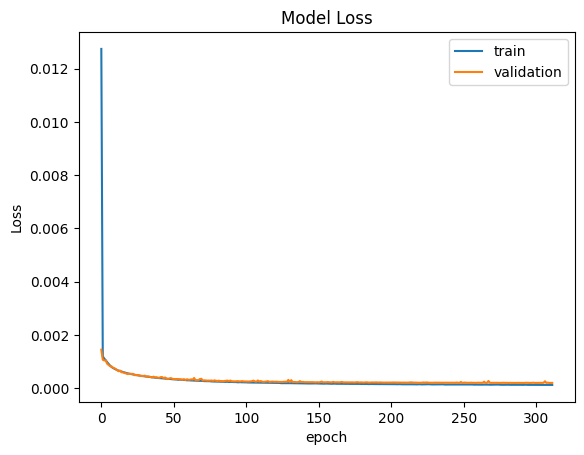

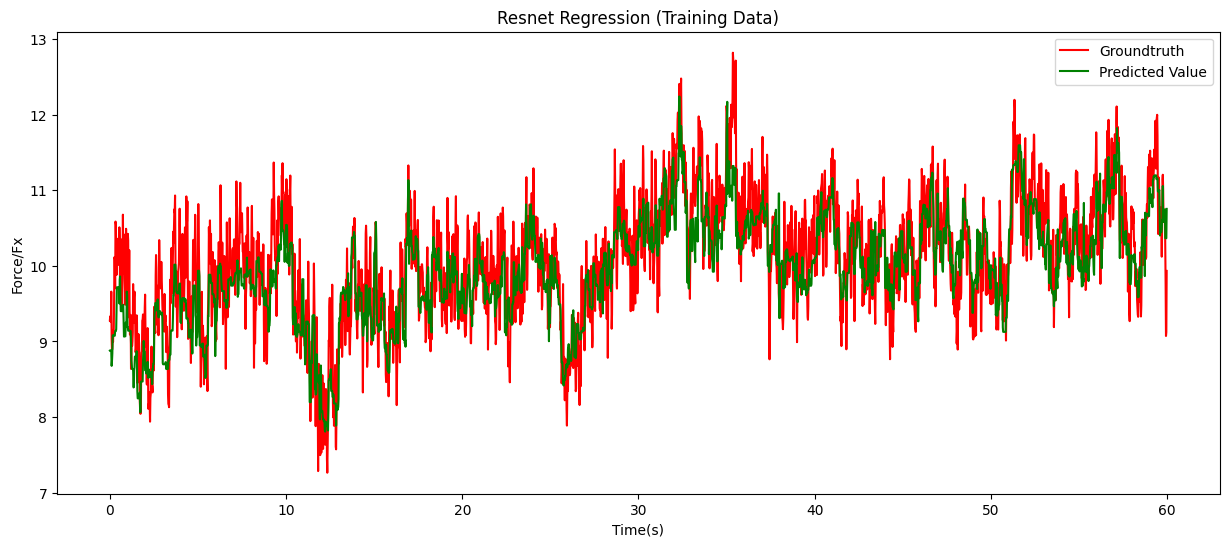

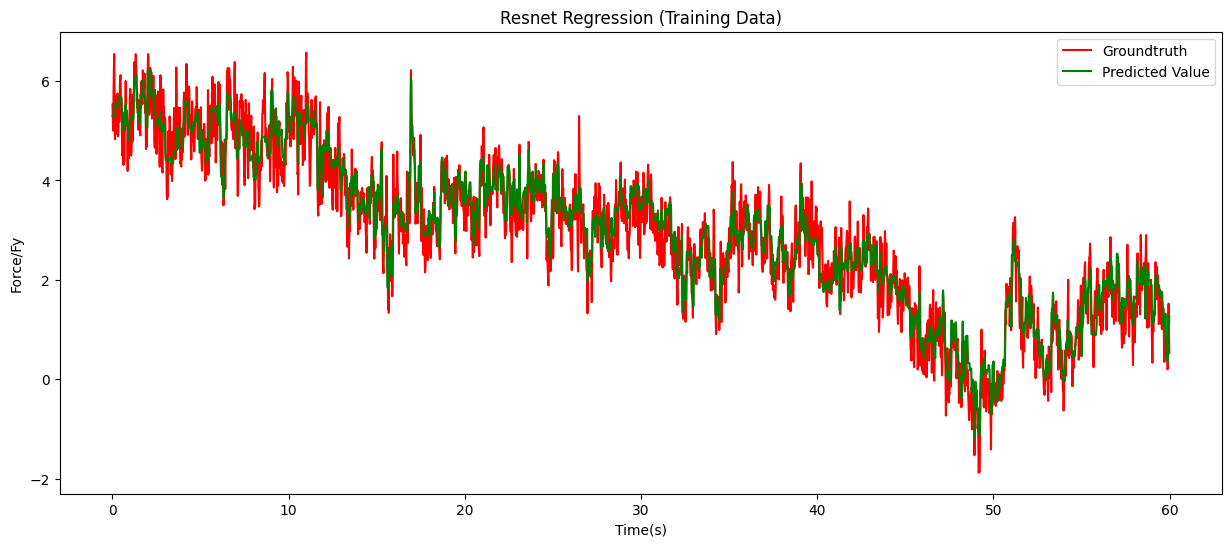

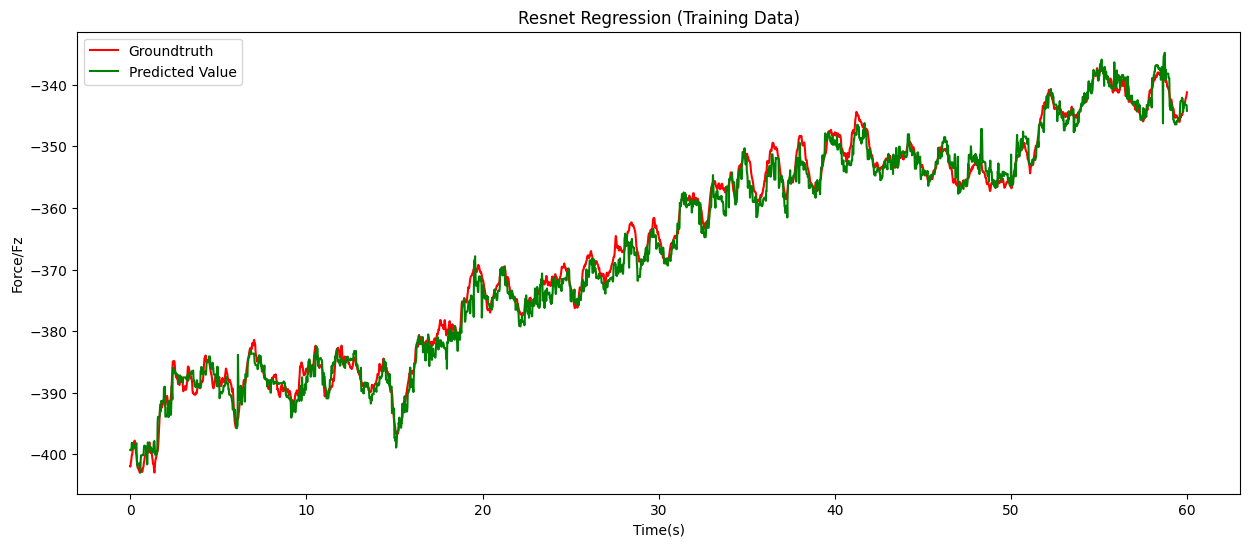

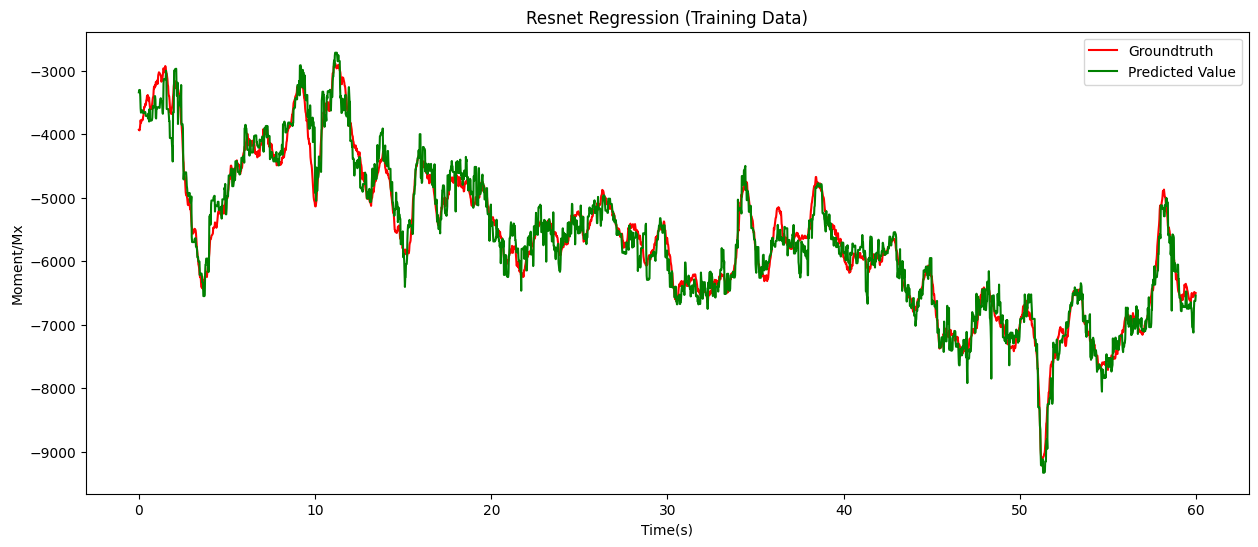

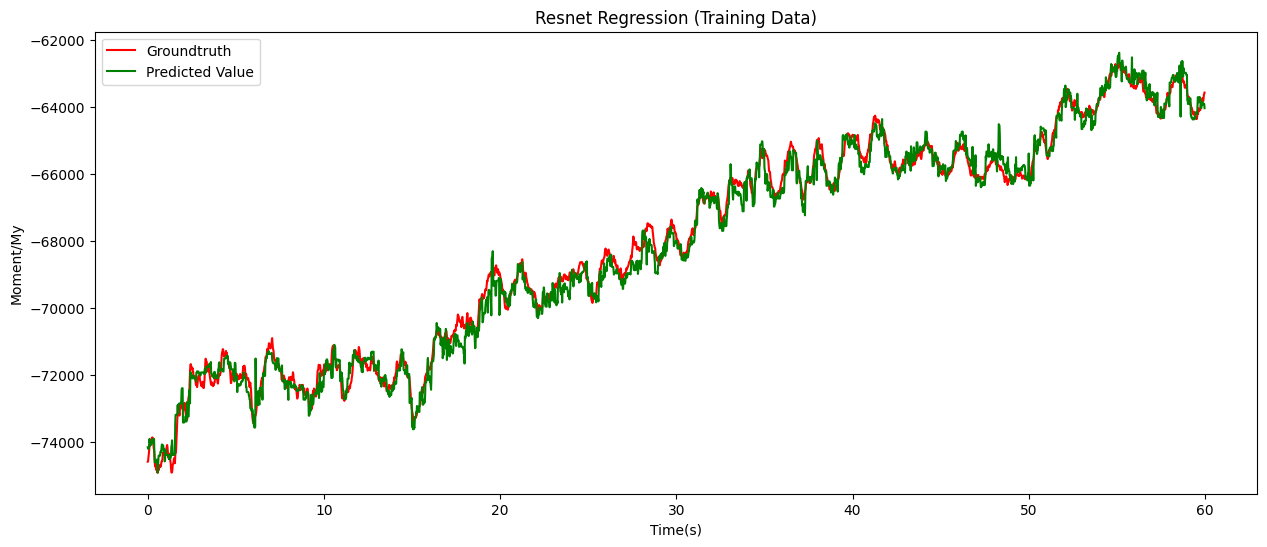

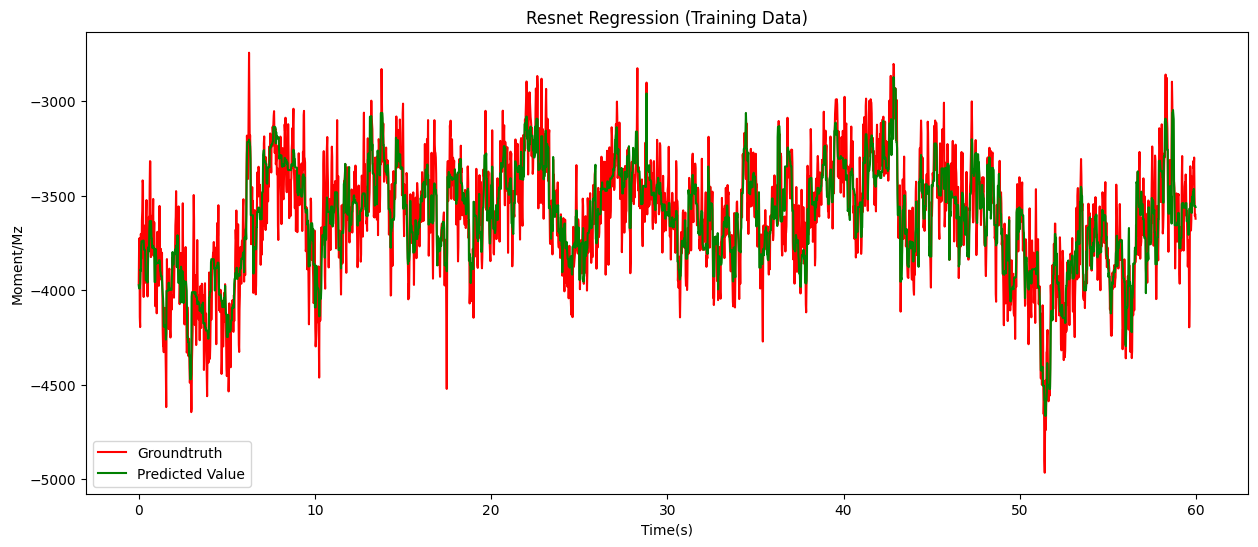

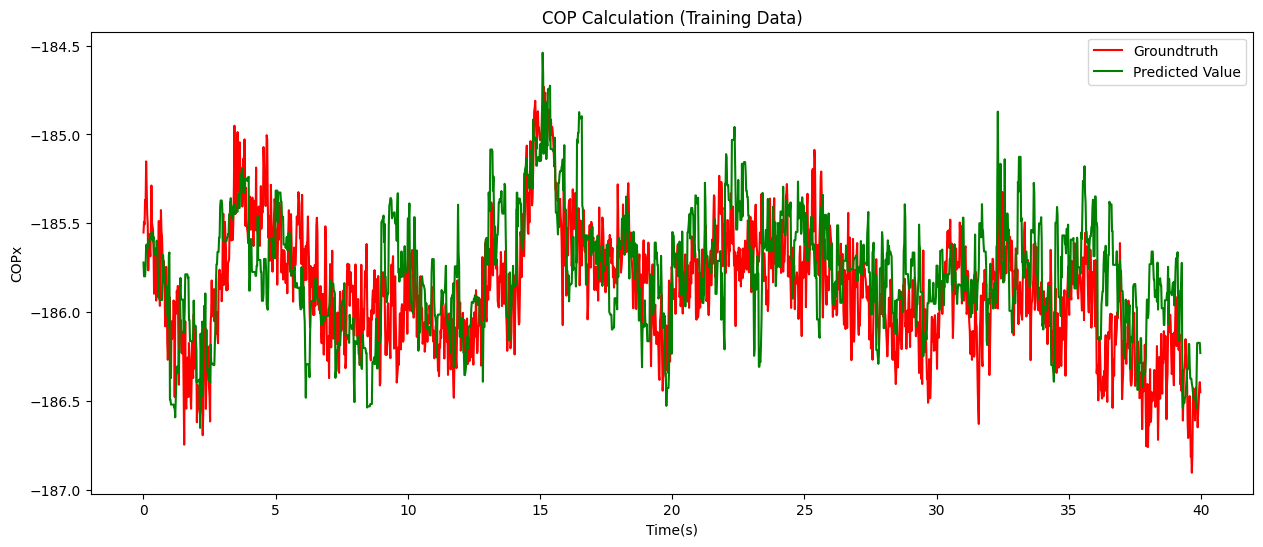

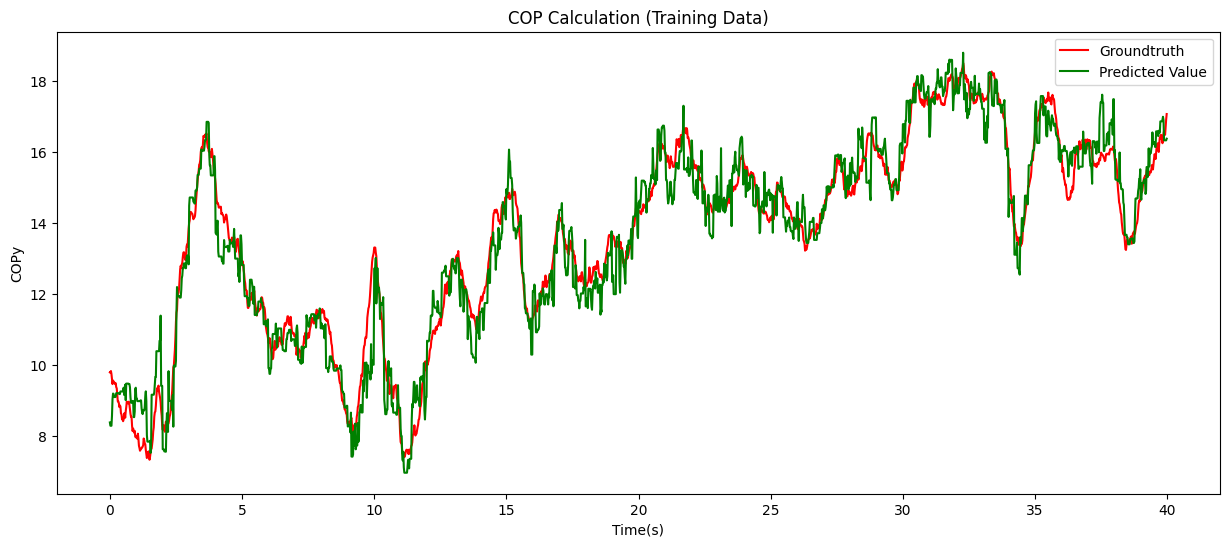

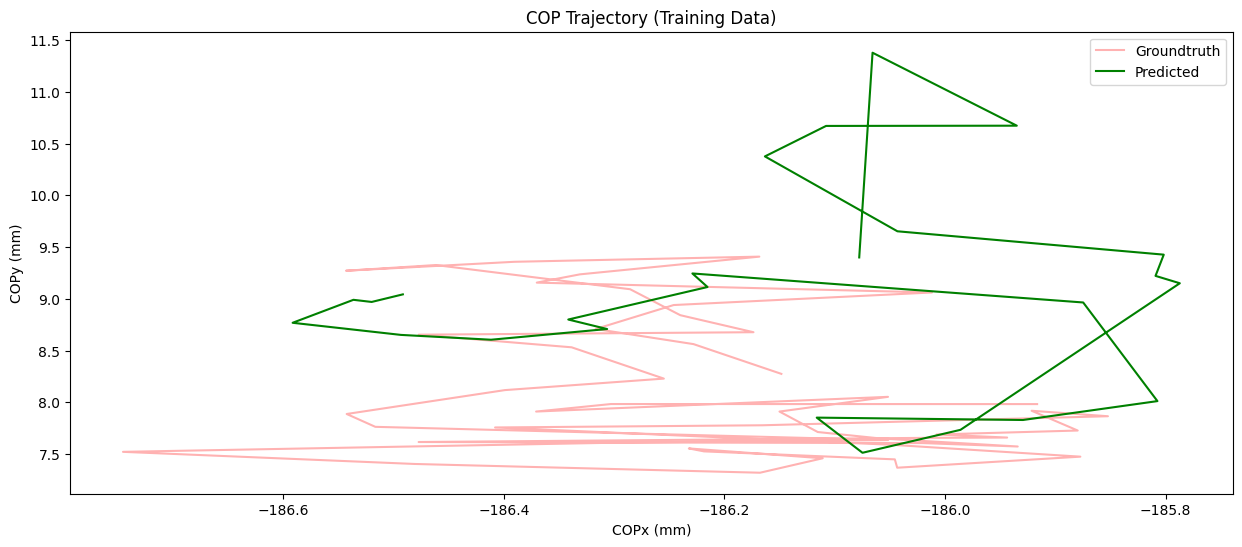

In [11]:
import math
from sklearn.metrics import mean_squared_error, r2_score

#Evaluate Model
Regression_Model.evaluate(train_data_reshaped, normalized_FPData)
ypred = Regression_Model.predict(train_data_reshaped)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
plt.savefig('Loss Result.png')

print('MSE: ',mean_squared_error(normalized_FPData, ypred))
print('RMSE: ',math.sqrt(mean_squared_error(normalized_FPData, ypred)))
print('Coefficient of determination (r2 Score): ', r2_score(normalized_FPData, ypred))


#Inverse
fx_real = scaler_fx.inverse_transform(normalized_fx)
fy_real = scaler_fy.inverse_transform(normalized_fy)
fz_real = scaler_fz.inverse_transform(normalized_fz)
mx_real = scaler_mx.inverse_transform(normalized_mx)
my_real = scaler_my.inverse_transform(normalized_my)
mz_real = scaler_mz.inverse_transform(normalized_mz)

fx_pred = scaler_fx.inverse_transform(ypred[:,0].reshape(-1,1))
fy_pred = scaler_fy.inverse_transform(ypred[:,1].reshape(-1,1))
fz_pred = scaler_fz.inverse_transform(ypred[:,2].reshape(-1,1))
mx_pred = scaler_mx.inverse_transform(ypred[:,3].reshape(-1,1))
my_pred = scaler_my.inverse_transform(ypred[:,4].reshape(-1,1))
mz_pred = scaler_mz.inverse_transform(ypred[:,5].reshape(-1,1))

FPReal = np.concatenate((fx_real, fy_real, fz_real, mx_real, my_real, mz_real), axis=1)
FPPred = np.concatenate((fx_pred, fy_pred, fz_pred, mx_pred, my_pred, mz_pred), axis=1)

y_inverse = FPReal
y_pred_inverse = FPPred

for i in range(len(y_pred_inverse)):
    if (np.abs(y_pred_inverse[i]) < 1).all():
        y_pred_inverse[i] = 0

for i in range(0, y_pred_inverse.shape[0], 50):
    zero_rows = np.count_nonzero(y_pred_inverse[i:i+50, :], axis=1) == 0
    non_zero_rows = np.count_nonzero(y_pred_inverse[i:i+50, :], axis=1) > 0
    if np.sum(zero_rows) > np.sum(non_zero_rows):
        y_pred_inverse[i:i+50, :][non_zero_rows] = 0.0

print('MSE: ',mean_squared_error(y_inverse, y_pred_inverse))
print('RMSE: ',math.sqrt(mean_squared_error(y_inverse, y_pred_inverse)))
print('Coefficient of determination (r2 Score): ', r2_score(y_inverse, y_pred_inverse))

# restore to original Data
FXData2 = y_inverse[:,0]*2
FXData2=  np.array(FXData2)
FXData2 = FXData2.reshape(-1,1)

FYData2 = y_inverse[:,1]*5
FYData2 =  np.array(FYData2)
FYData2 = FYData2.reshape(-1,1)

FZData2 = (y_inverse[:,2]*100)
FZData2 =  np.array(FZData2)
FZData2 = FZData2.reshape(-1,1)

MXData2 = (y_inverse[:,3]*10000)
MXData2 =  np.array(MXData2)
MXData2 = MXData2.reshape(-1,1)

MYData2 = (y_inverse[:,4]*10000)
MYData2 =  np.array(MYData2)
MYData2 = MYData2.reshape(-1,1
                          )
MZData2 = (y_inverse[:,5]*1000)
MZData2 =  np.array(MZData2)
MZData2 = MZData2.reshape(-1,1)

new_inverse2 = np.concatenate((FXData2, FYData2, FZData2, MXData2, MYData2, MZData2), axis=1)

FXData3 = y_pred_inverse[:,0]*2
FXData3=  np.array(FXData3)
FXData3 = FXData3.reshape(-1,1)

FYData3 = y_pred_inverse[:,1]*5
FYData3 =  np.array(FYData3)
FYData3 = FYData3.reshape(-1,1)

FZData3 = (y_pred_inverse[:,2]*100)
FZData3 =  np.array(FZData3)
FZData3 = FZData3.reshape(-1,1)

MXData3 = (y_pred_inverse[:,3]*10000)
MXData3 =  np.array(MXData3)
MXData3 = MXData3.reshape(-1,1)

MYData3 = (y_pred_inverse[:,4]*10000)
MYData3 =  np.array(MYData3)
MYData3 = MYData3.reshape(-1,1)

MZData3 = (y_pred_inverse[:,5]*1000)
MZData3 =  np.array(MZData3)
MZData3 = MZData3.reshape(-1,1)

new_inverse3 = np.concatenate((FXData3, FYData3, FZData3, MXData3, MYData3, MZData3), axis=1)

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,new_inverse2[0:3000,i],color='red')
    plt.plot(x,new_inverse3[0:3000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()

# COP
from math import*
np.seterr(divide='ignore', invalid='ignore')

out_Fz = new_inverse2[:,2]
out_Mx = new_inverse2[:,3]
out_My = new_inverse2[:,4]
Pred_Fz = new_inverse3[:,2]
Pred_Mx = new_inverse3[:,3]
Pred_My = new_inverse3[:,4]

Pred_COPx=[]
for i in range(0,len(Pred_Fz)):
  Pred_COPx_temp=-(Pred_My[i])/Pred_Fz[i]
  # print(temp)
  if Pred_COPx_temp != Pred_COPx_temp:
    Pred_COPx_temp=0
  Pred_COPx.append(Pred_COPx_temp)
  # break

out_COPx=[]
for i in range(0,len(out_Fz)):
  out_COPx_temp=-(out_My[i])/out_Fz[i]
  # print(temp)
  if out_COPx_temp != out_COPx_temp:
    out_COPx_temp=0
  out_COPx.append(out_COPx_temp)
  # break

Pred_COPy=[]
for i in range(0,len(Pred_Mx)):
  Pred_COPy_temp=Pred_Mx[i]/Pred_Fz[i]
  # print(temp)
  if Pred_COPy_temp != Pred_COPy_temp:
    Pred_COPy_temp=0
  Pred_COPy.append(Pred_COPy_temp)
  # break

out_COPy=[]
for i in range(0,len(out_Mx)):
  out_COPy_temp=out_Mx[i]/out_Fz[i]
  # print(temp)
  if out_COPy_temp != out_COPy_temp:
    out_COPy_temp=0
  out_COPy.append(out_COPy_temp)
  # break


# out_COPx = -(out_My)/out_Fz
out_COPx = np.array(out_COPx)
out_COPx= out_COPx.reshape(-1,1)

# out_COPy = out_Mx/out_Fz
out_COPy = np.array(out_COPy)
out_COPy= out_COPy.reshape(-1,1)

# Pred_COPx = -(Pred_My)/Pred_Fz
Pred_COPx = np.array(Pred_COPx)
Pred_COPx= Pred_COPx.reshape(-1,1)

# Pred_COPy = Pred_Mx/Pred_Fz
Pred_COPy = np.array(Pred_COPy)
Pred_COPy= Pred_COPy.reshape(-1,1)

Pred_COP = np.concatenate((Pred_COPx, Pred_COPy), axis=1)
FC_COP = np.concatenate((out_COPx, out_COPy), axis=1)

col_COP = 'COPx', 'COPy'

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,2000)*40/2000 
for i in range(0,2):
    plt.figure(figsize=(15,6))
    plt.plot(x,FC_COP[0:2000,i], color='red')
    plt.plot(x,Pred_COP[0:2000,i],markerfacecolor='none',color='green')
    plt.title('COP Calculation (Training Data)')
    plt.ylabel(col_COP[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.savefig('Regression Result.png'[i])
    plt.show()

# Trajectory
from matplotlib import pyplot

x = range(50)
y1 = FC_COP[50:100,0]
y2 = FC_COP[50:100,1]
y3 = Pred_COP[50:100,0]
y4 = Pred_COP[50:100,1]

# pyplot.figure(figsize=(15,6))
# pyplot.plot(FC_COP[:,0],FC_COP[:,1])
# pyplot.show()

data_filter = abs(y1) > 0
data_filter2 = abs(y3) > 0
pyplot.figure(figsize=(15,6))
pyplot.plot(y1[data_filter], y2[data_filter ], color='red', alpha=0.3)
pyplot.plot(y3[data_filter2], y4[data_filter2 ], color='green')
# pyplot.plot(y1, y2, color='red')
# pyplot.plot(y3, y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

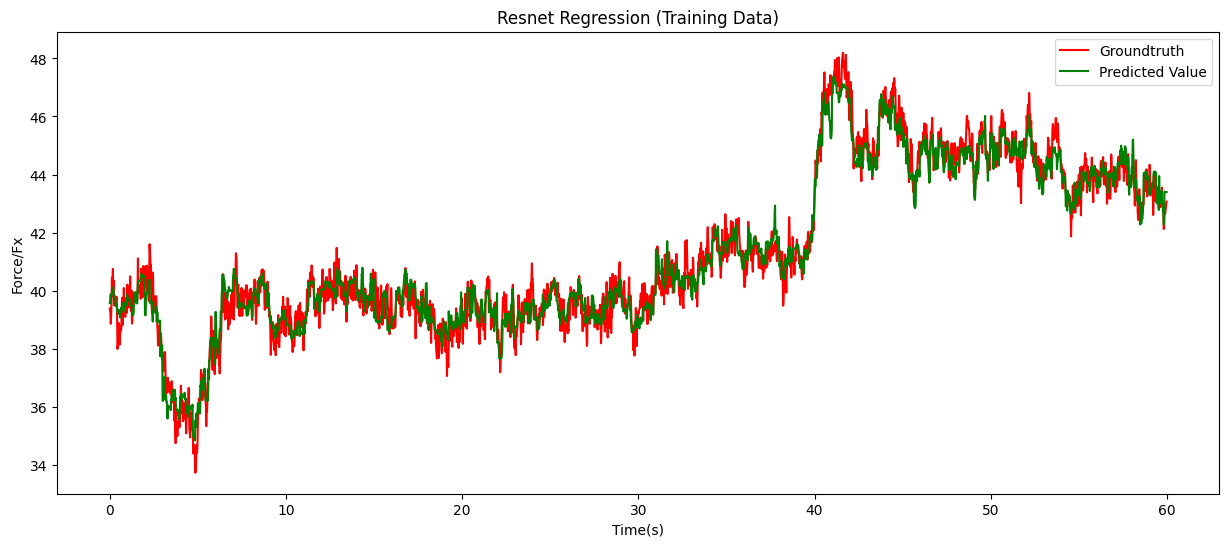

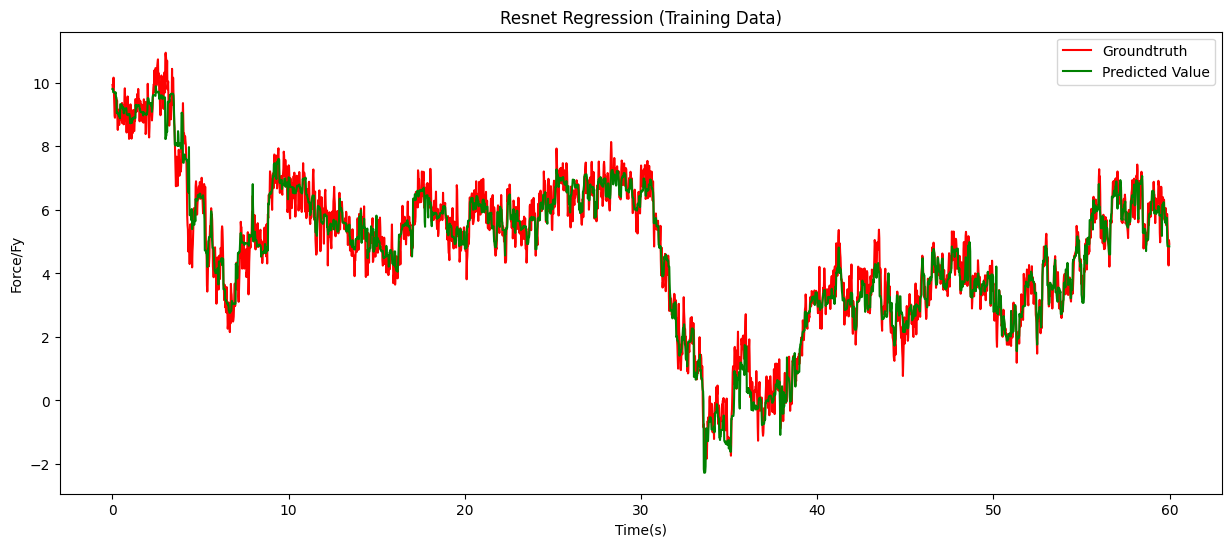

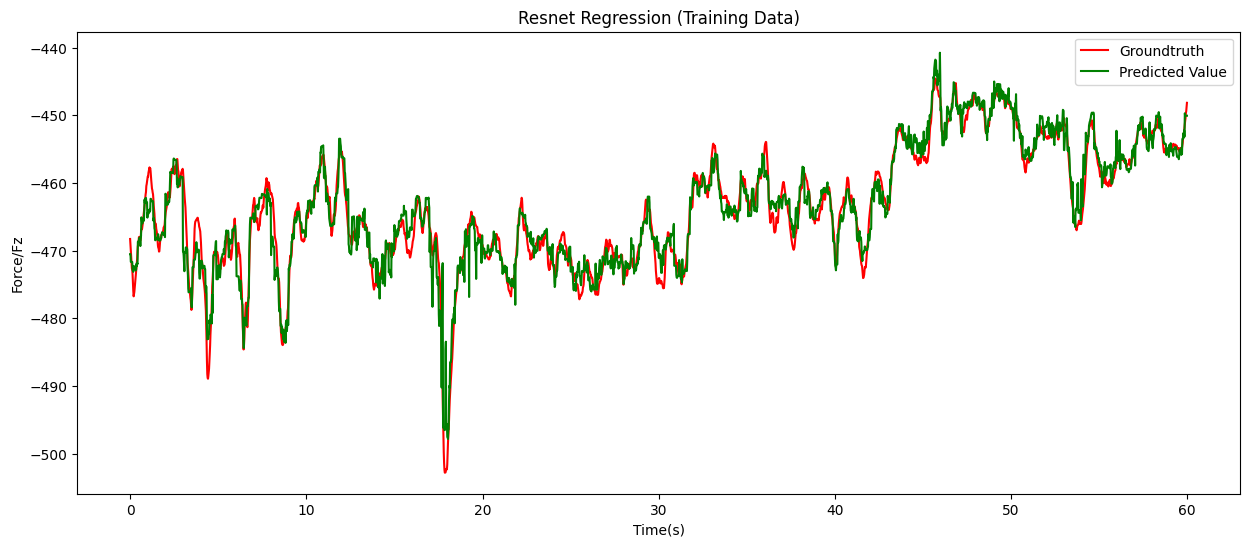

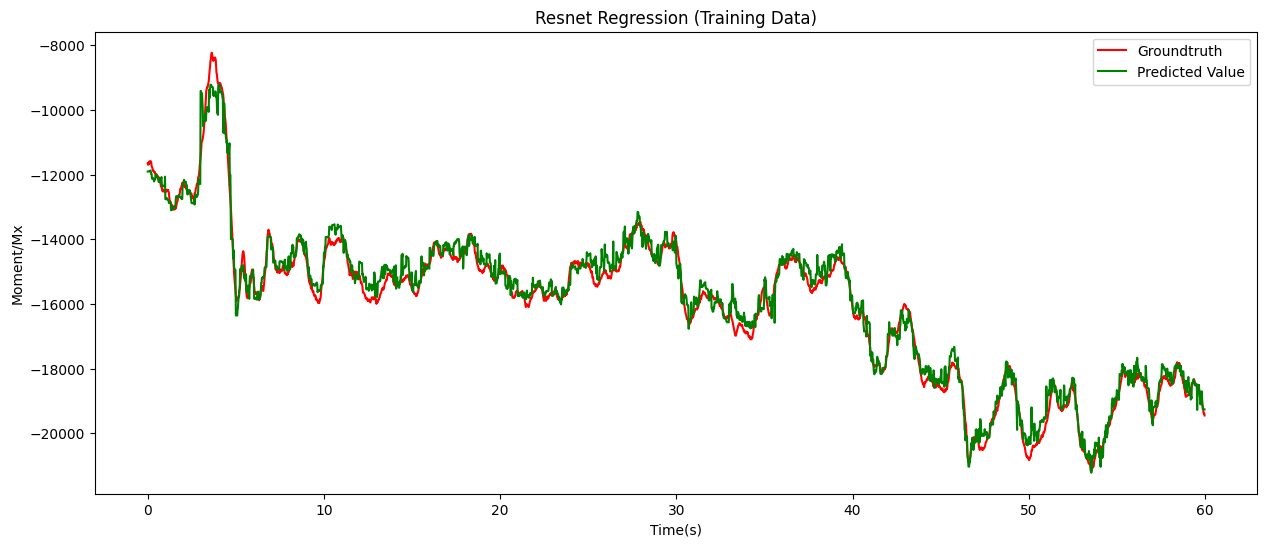

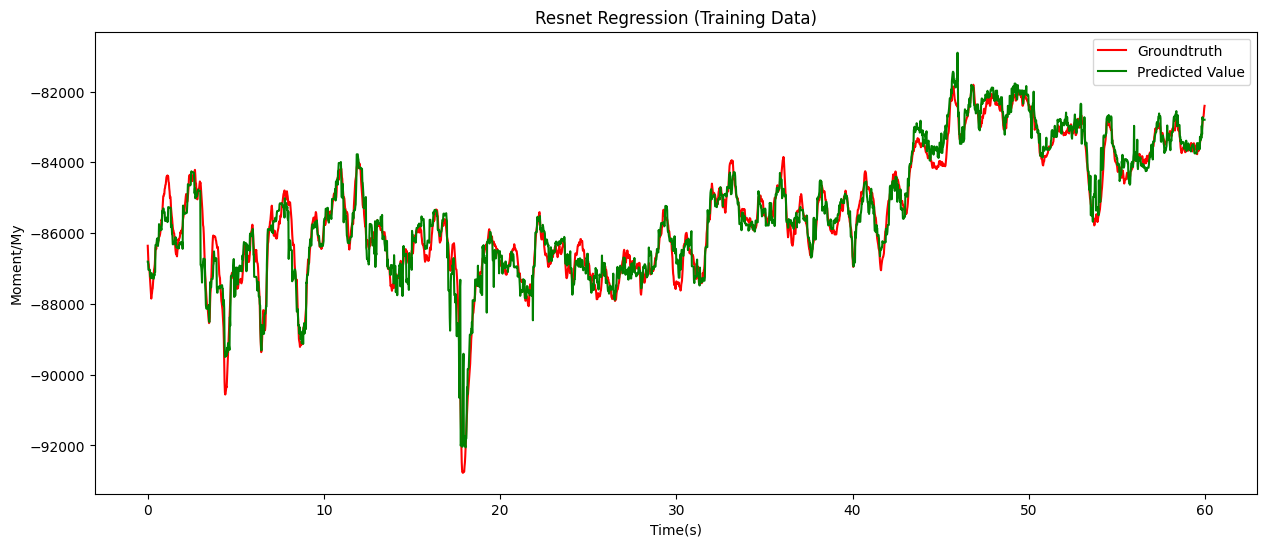

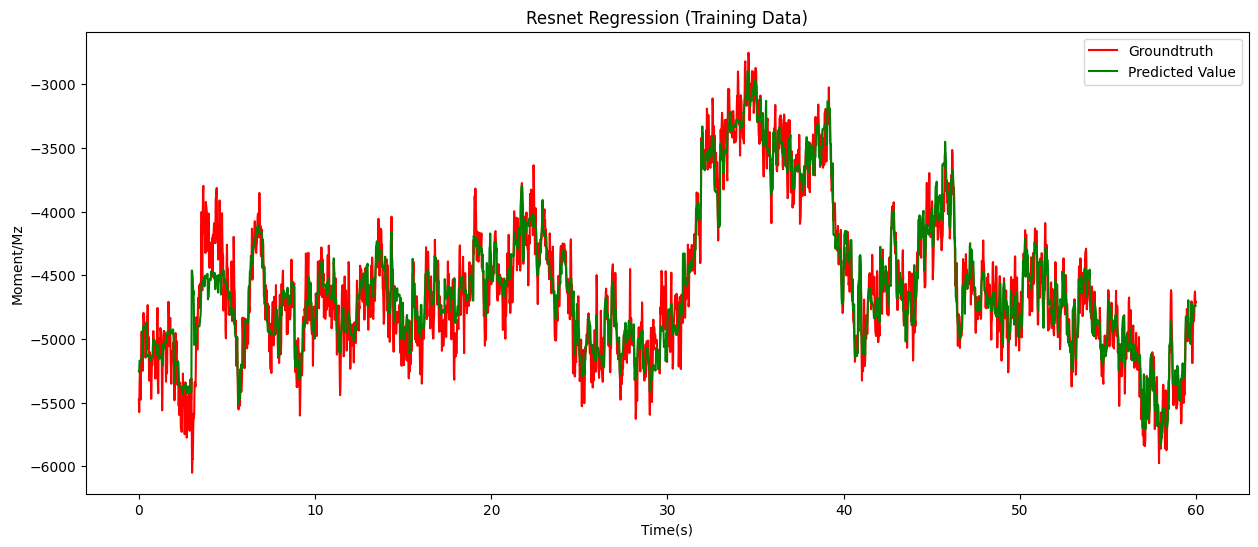

In [12]:
x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,new_inverse2[15000:18000,i],color='red')
    plt.plot(x,new_inverse3[15000:18000,i], markerfacecolor='none',color='green')
    plt.title('Resnet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.show()

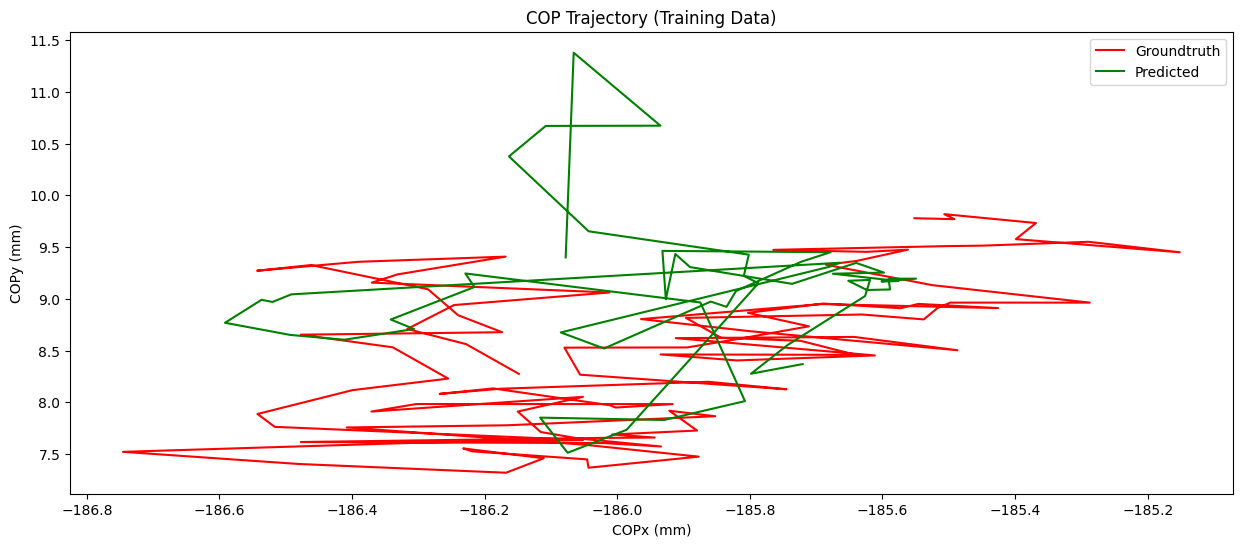

In [13]:
x = range(100)
y1 = FC_COP[0:100,0]
y2 = FC_COP[0:100,1]
y3 = Pred_COP[0:100,0]
y4 = Pred_COP[0:100,1]

pyplot.figure(figsize=(15,6))
pyplot.plot(y1, y2, color='red')
pyplot.plot(y3, y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

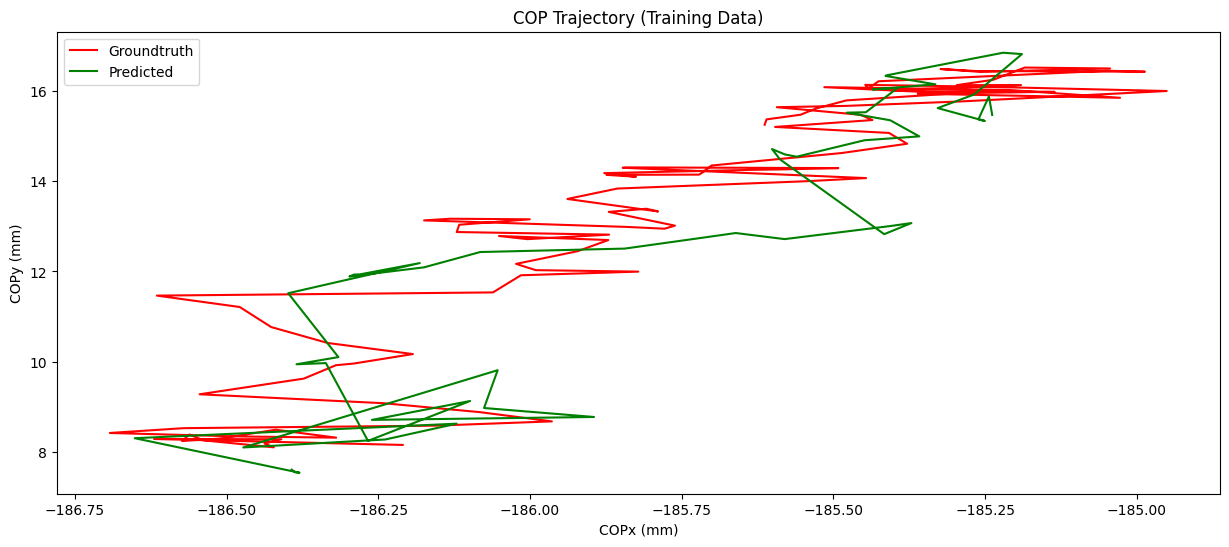

In [14]:
x = range(100)
y1 = FC_COP[100:200,0]
y2 = FC_COP[100:200,1]
y3 = Pred_COP[100:200,0]
y4 = Pred_COP[100:200,1]

pyplot.figure(figsize=(15,6))
pyplot.plot(y1, y2, color='red')
pyplot.plot(y3, y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

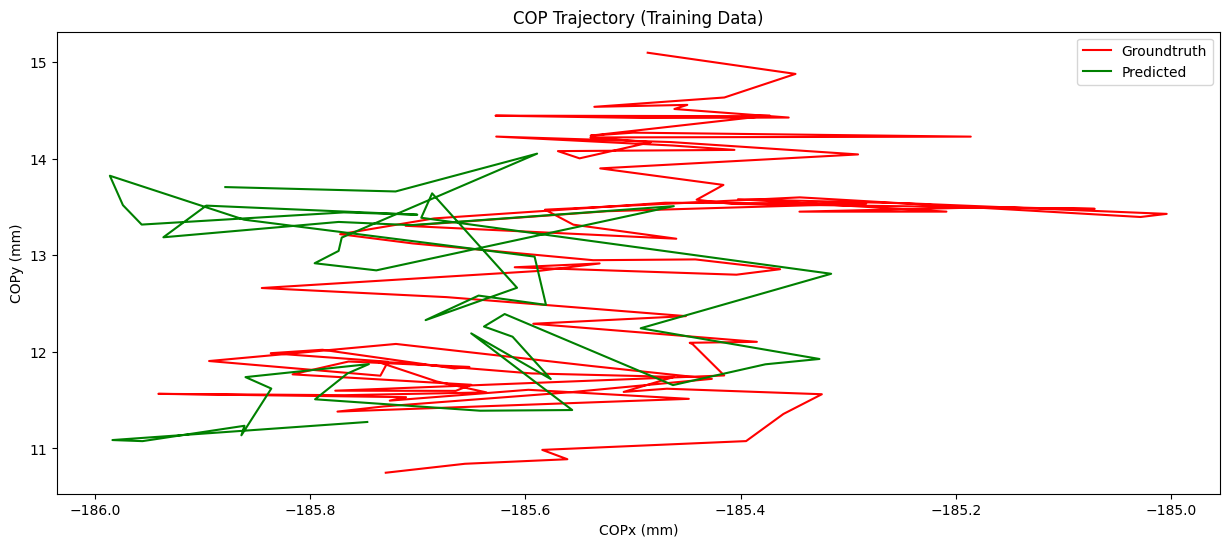

In [15]:
x = range(100)
y1 = FC_COP[200:300,0]
y2 = FC_COP[200:300,1]
y3 = Pred_COP[200:300,0]
y4 = Pred_COP[200:300,1]

pyplot.figure(figsize=(15,6))
pyplot.plot(y1, y2, color='red')
pyplot.plot(y3, y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

In [16]:
new_inverse2[50]

array([     9.505469 ,      5.8400493,   -399.76398  ,  -3191.2085   ,
       -74322.71     ,  -3869.2      ], dtype=float32)

In [17]:
new_inverse3[50]

array([     9.18952  ,      5.2550535,   -398.06262  ,  -3599.791    ,
       -74235.375    ,  -3859.3018   ], dtype=float32)

In [18]:
new_inverse2[0]

array([     9.27914  ,      5.5224094,   -401.95297  ,  -3930.7913   ,
       -74583.1      ,  -3964.45     ], dtype=float32)

In [19]:
new_inverse3[0]

array([     8.879273 ,      5.2961454,   -399.28296  ,  -3341.7878   ,
       -74155.       ,  -3974.0286   ], dtype=float32)

In [20]:
y_inverse[50]

array([ 4.7527347 ,  1.1680099 , -3.99764   , -0.31912085, -7.432271  ,
       -3.8692    ], dtype=float32)

In [21]:
y_pred_inverse[50]

array([ 4.59476  ,  1.0510107, -3.980626 , -0.3599791, -7.4235373,
       -3.8593018], dtype=float32)

Test and Predict

[[ 4.752735    1.16801    -3.9976401  -0.319121   -7.4322705  -3.8692    ]
 [ 5.2125      1.165454   -3.99143    -0.318649   -7.43615    -4.12229   ]
 [ 5.16795     1.083616   -3.9877     -0.315453   -7.43191    -3.97633   ]
 [ 4.660315    0.89965    -3.98708    -0.321073   -7.41803    -3.69156   ]
 [ 4.839925    0.93606997 -3.9822102  -0.315018   -7.41289    -3.79918   ]]
188/188 [==============================] - 1s 4ms/step
[[ 4.59476     1.0510107  -3.980626   -0.3599791  -7.4235373  -3.8593018 ]
 [ 4.59476     1.0510107  -3.980626   -0.3599791  -7.4235373  -3.8593018 ]
 [ 4.5711336   1.0523716  -3.9876194  -0.35769027 -7.437706   -3.8556483 ]
 [ 4.5711336   1.0523716  -3.9876194  -0.35769027 -7.437706   -3.8556483 ]
 [ 4.5711336   1.0523716  -3.9876194  -0.35769027 -7.437706   -3.8556483 ]]


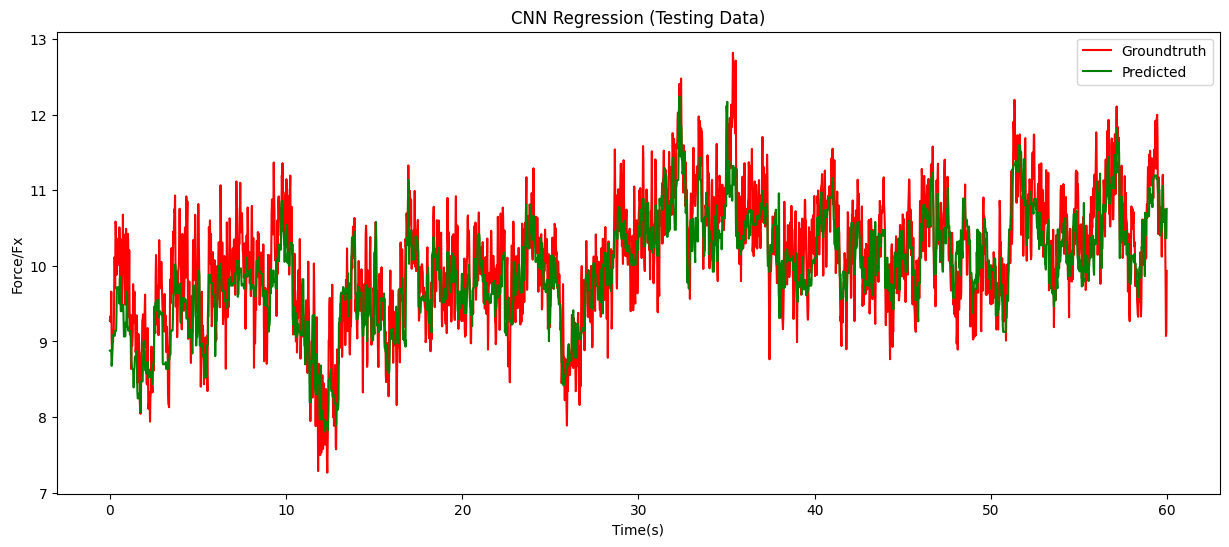

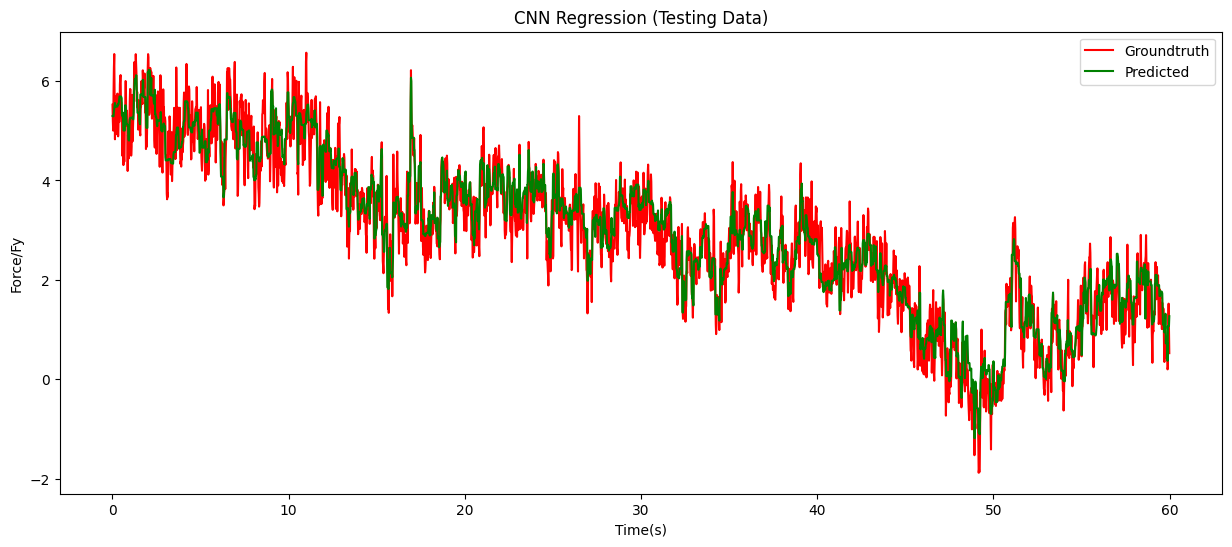

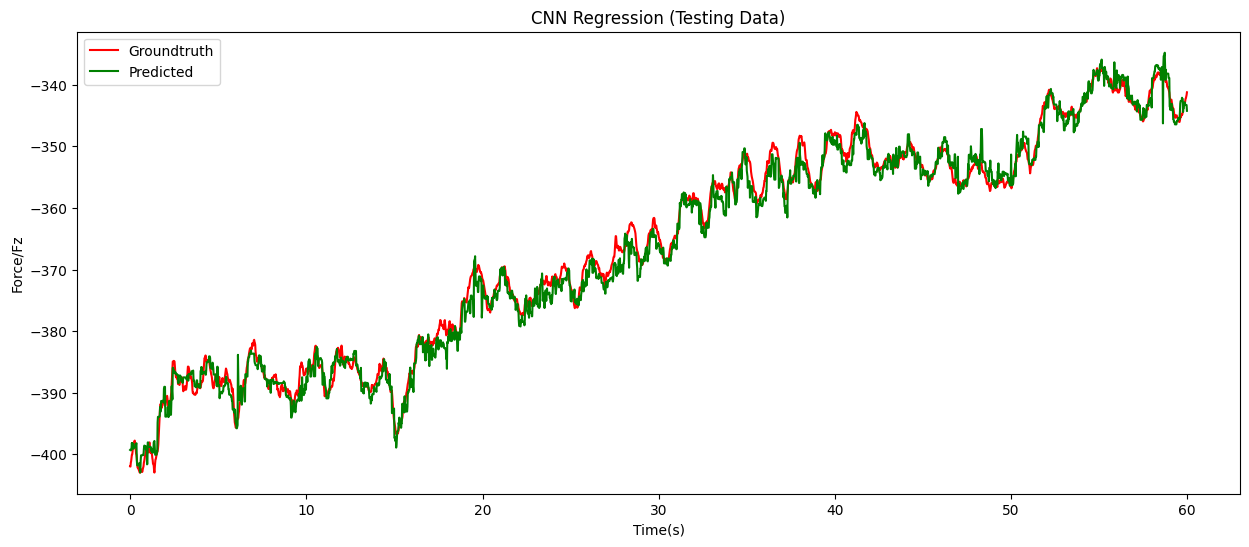

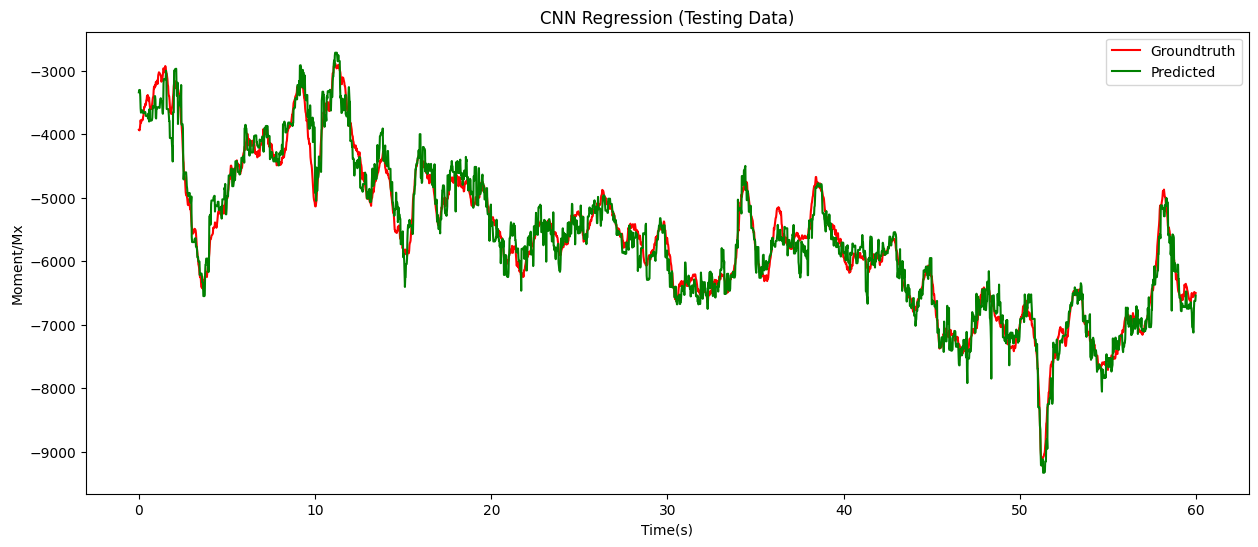

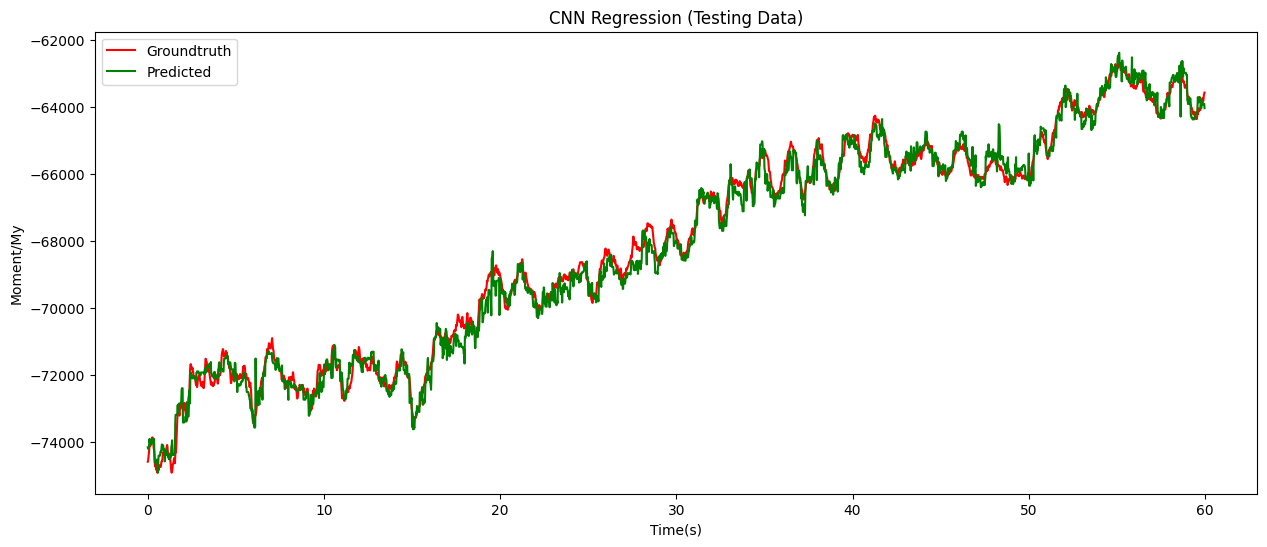

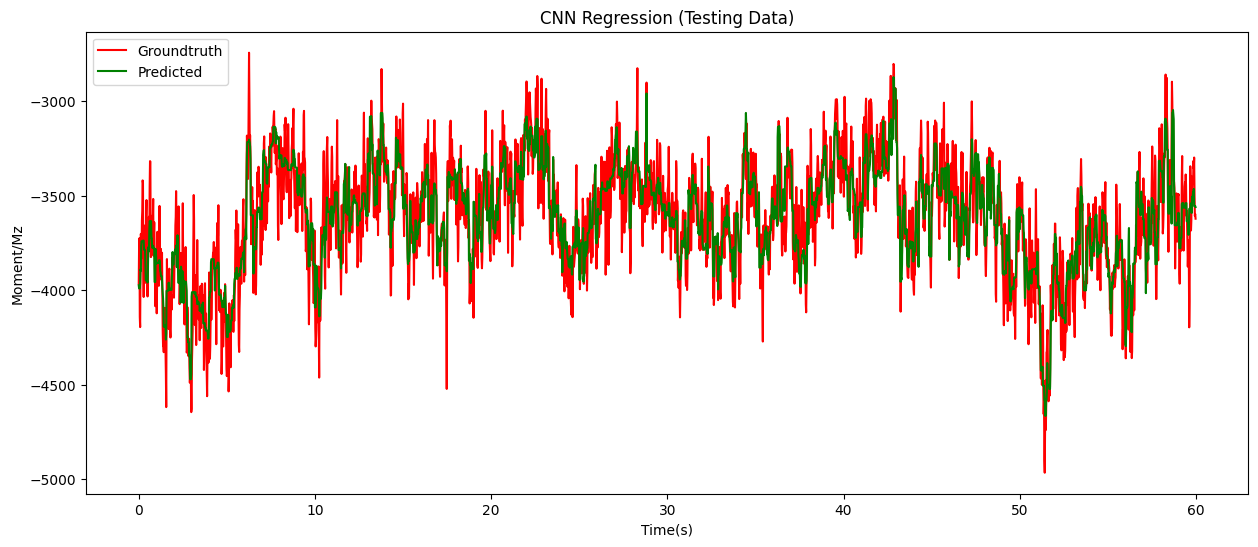

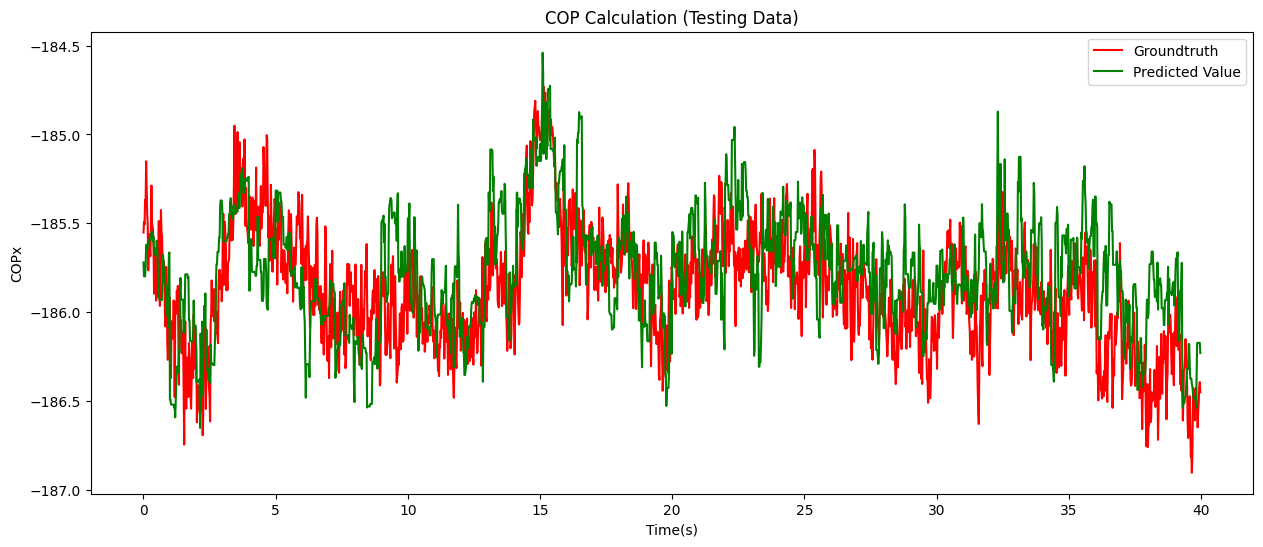

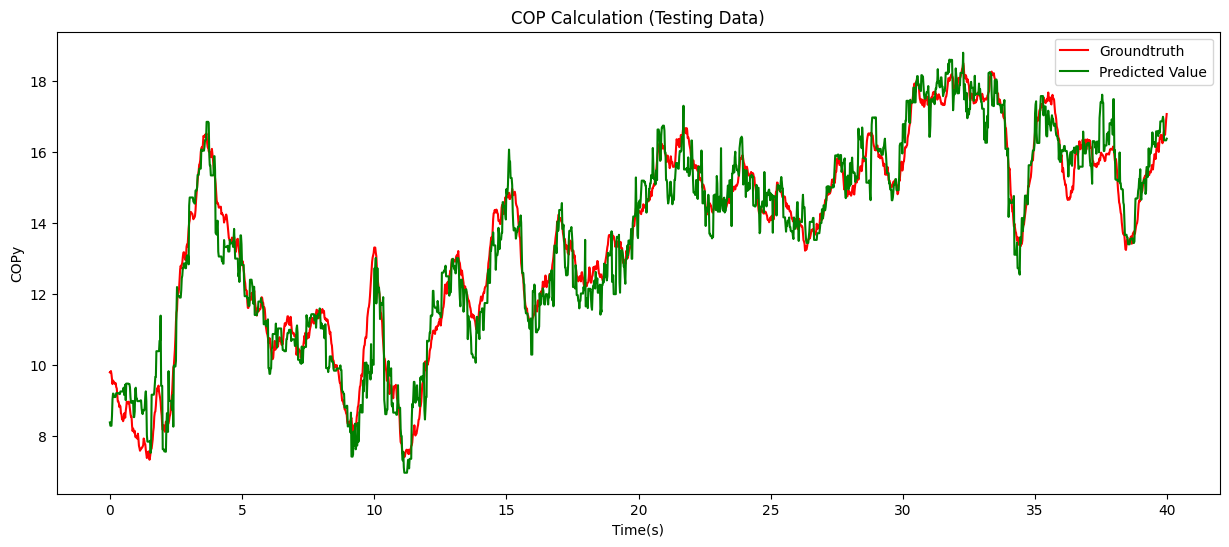

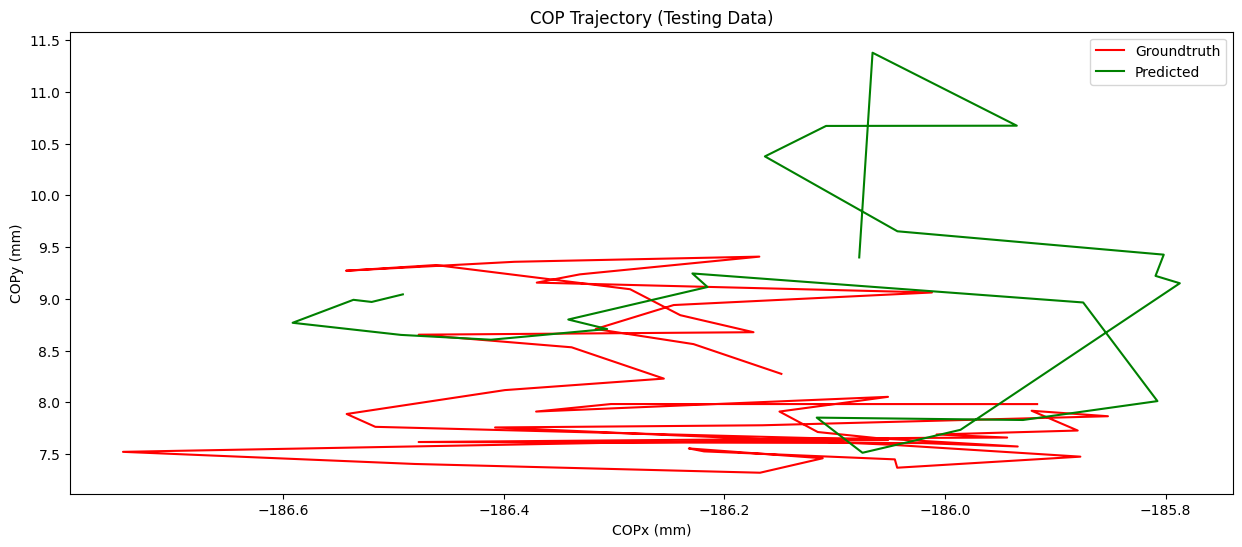

In [30]:
## Model Validation
Test_Insole = pd.read_csv('0310AyuStand5Min1.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0310AyuStand5Min1.csv', low_memory=False)
Test_columns = ['Fx','Fy','Fz','Mx','My','Mz']
Test_selected_df = Test_df[Test_columns]
Test_FPDatas = Test_selected_df[:6000]


test_SmartInsole = np.array(TestSIData[:6000]).astype('float32')
Test_FPData = np.array(Test_FPDatas).astype('float32')

Test_FXData = Test_FPData[:,0]/2
Test_FXData =  np.array(Test_FXData)
Test_FXData = Test_FXData.reshape(-1,1)
Test_FYData = Test_FPData[:,1]/5
Test_FYData =  np.array(Test_FYData)
Test_FYData = Test_FYData.reshape(-1,1)
Test_FZData = (Test_FPData[:,2])/100
Test_FZData =  np.array(Test_FZData)
Test_FZData = Test_FZData.reshape(-1,1)
Test_MXData = (Test_FPData[:,3])/10000
Test_MXData =  np.array(Test_MXData)
Test_MXData = Test_MXData.reshape(-1,1)
Test_MYData = (Test_FPData[:,4])/10000
Test_MYData =  np.array(Test_MYData)
Test_MYData =Test_MYData.reshape(-1,1)
Test_MZData = (Test_FPData[:,5])/1000
Test_MZData =  np.array(Test_MZData)
Test_MZData = Test_MZData.reshape(-1,1)

Test_newFPData = np.concatenate((Test_FXData, Test_FYData, Test_FZData, Test_MXData, Test_MYData, Test_MZData), axis=1)
# Test_newFPData = np.round(Test_newFPData,2)
## End Load Data

print(Test_newFPData[50:55])

Test_SIDWTcoeffs = []
for i in range(89):
    coeffsN = pywt.wavedec(test_SmartInsole[:, i], wavelet)
    coeffsN[-1] = np.zeros_like(coeffsN[-1])
    # coeffs[-2] = np.zeros_like(coeffs[-2])
    # coeffs[-3] = np.zeros_like(coeffs[-3])
    # coeffs[-4] = np.zeros_like(coeffs[-4])
    # coeffs[-5] = np.zeros_like(coeffs[-5])
    # coeffs[-6] = np.zeros_like(coeffs[-6])
    # coeffs[-7] = np.zeros_like(coeffs[-7])
    Test_SIDWTcoeffs.append(coeffsN)

Test_SIData_filtered = np.zeros(test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(Test_SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

# for i in range(len(test_SmartInsole)):
#     if i < len(test_SmartInsole):
# #         Test_SIData_filtered[i][0] = i+1
#         test_SmartInsole[i][0] = test_SmartInsole[i][0] + (iter % max_iter) + 1
#         iter += 1
#     else:
#         test_SmartInsole[i][0] = i+1

# for i in range(len(Test_SIData_filtered)):
#     Test_SIData_filtered[i][0] = i-1
#     iter += 1

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][np.abs(Test_SIData_filtered[i]) < 1] = 0


# Normalize each feature separately
test_normalized_SIData = scaler_SI.transform(test_SmartInsole)
test_normalized_fx = scaler_fx.transform(Test_newFPData[:, 0].reshape(-1, 1))
test_normalized_fy = scaler_fy.transform(Test_newFPData[:, 1].reshape(-1, 1))
test_normalized_fz = scaler_fz.transform(Test_newFPData[:, 2].reshape(-1, 1))
test_normalized_mx = scaler_mx.transform(Test_newFPData[:, 3].reshape(-1, 1))
test_normalized_my = scaler_my.transform(Test_newFPData[:, 4].reshape(-1, 1))
test_normalized_mz = scaler_mz.transform(Test_newFPData[:, 5].reshape(-1, 1))

# Combine the normalized features back into a single numpy array
test_normalized_FPData= np.concatenate((test_normalized_fx, test_normalized_fy, test_normalized_fz, 
                                        test_normalized_mx, test_normalized_my, test_normalized_mz), axis=1)

# Test_xscale = scaler_x.transform(test_normalized_SIData)
# Test_yscale = scaler_y.transform(test_normalized_FPData)

test_sample_size = test_normalized_SIData.shape[0] # number of samples in train set
test_time_steps  = test_normalized_SIData.shape[1] # number of features in train set
test_input_dimension = 1               # each feature is represented by 1 number

test_train_data_reshaped = test_normalized_SIData.reshape(test_sample_size,test_time_steps,test_input_dimension)

Regression_Model.evaluate(test_train_data_reshaped, test_normalized_FPData)
Test_FP_pred = Regression_Model.predict(test_train_data_reshaped)

#invert normalize
test_fx_real = scaler_fx.inverse_transform(test_normalized_fx)
test_fy_real = scaler_fy.inverse_transform(test_normalized_fy)
test_fz_real = scaler_fz.inverse_transform(test_normalized_fz)
test_mx_real = scaler_mx.inverse_transform(test_normalized_mx)
test_my_real = scaler_my.inverse_transform(test_normalized_my)
test_mz_real = scaler_mz.inverse_transform(test_normalized_mz)

test_fx_pred = scaler_fx.inverse_transform(Test_FP_pred[:,0].reshape(-1,1))
test_fy_pred = scaler_fy.inverse_transform(Test_FP_pred[:,1].reshape(-1,1))
test_fz_pred = scaler_fz.inverse_transform(Test_FP_pred[:,2].reshape(-1,1))
test_mx_pred = scaler_mx.inverse_transform(Test_FP_pred[:,3].reshape(-1,1))
test_my_pred = scaler_my.inverse_transform(Test_FP_pred[:,4].reshape(-1,1))
test_mz_pred = scaler_mz.inverse_transform(Test_FP_pred[:,5].reshape(-1,1))

test_FPReal = np.concatenate((test_fx_real, test_fy_real, test_fz_real, 
                              test_mx_real, test_my_real, test_mz_real), axis=1)
test_FPPred = np.concatenate((test_fx_pred, test_fy_pred, test_fz_pred, 
                              test_mx_pred, test_my_pred, test_mz_pred), axis=1)

Test_y_pred_inverse = test_FPPred
Test_y_inverse = test_FPReal

for i in range(len(Test_y_pred_inverse)):
    if (np.abs(Test_y_pred_inverse[i]) < 1).all():
        Test_y_pred_inverse[i] = 0

for i in range(0, Test_y_pred_inverse.shape[0], 50):
    zero_rows = np.count_nonzero(Test_y_pred_inverse[i:i+50, :], axis=1) == 0
    non_zero_rows = np.count_nonzero(Test_y_pred_inverse[i:i+50, :], axis=1) > 0
    if np.sum(zero_rows) > np.sum(non_zero_rows):
        Test_y_pred_inverse[i:i+50, :][non_zero_rows] = 0.0

print(Test_y_pred_inverse[50:55])


# Test_new_inverse2 = Test_y_inverse
# Test_new_inverse3 = Test_y_pred_inverse
        
# make to original Data
Test_FXData2 = Test_y_inverse[:,0]*2
Test_FXData2=  np.array(Test_FXData2)
Test_FXData2 = Test_FXData2.reshape(-1,1)

Test_FYData2 = Test_y_inverse[:,1]*5
Test_FYData2 =  np.array(Test_FYData2)
Test_FYData2 = Test_FYData2.reshape(-1,1)

Test_FZData2 = (Test_y_inverse[:,2]*100)
Test_FZData2 =  np.array(Test_FZData2)
Test_FZData2 = Test_FZData2.reshape(-1,1)

Test_MXData2 = (Test_y_inverse[:,3]*10000)
Test_MXData2 =  np.array(Test_MXData2)
Test_MXData2 = Test_MXData2.reshape(-1,1)

Test_MYData2 = (Test_y_inverse[:,4]*10000)
Test_MYData2 =  np.array(Test_MYData2)
Test_MYData2 = Test_MYData2.reshape(-1,1
                          )
Test_MZData2 = (Test_y_inverse[:,5]*1000)
Test_MZData2 =  np.array(Test_MZData2)
Test_MZData2 = Test_MZData2.reshape(-1,1)


Test_new_inverse2 = np.concatenate((Test_FXData2, Test_FYData2, Test_FZData2, Test_MXData2, Test_MYData2, Test_MZData2), axis=1)

Test_FXData3 = Test_y_pred_inverse[:,0]*2
Test_FXData3=  np.array(Test_FXData3)
Test_FXData3 = Test_FXData3.reshape(-1,1)

Test_FYData3 = Test_y_pred_inverse[:,1]*5
Test_FYData3 =  np.array(Test_FYData3)
Test_FYData3 = Test_FYData3.reshape(-1,1)

Test_FZData3 = (Test_y_pred_inverse[:,2]*100)
Test_FZData3 =  np.array(Test_FZData3)
Test_FZData3 = Test_FZData3.reshape(-1,1)

Test_MXData3 = (Test_y_pred_inverse[:,3]*10000)
Test_MXData3 =  np.array(Test_MXData3)
Test_MXData3 = Test_MXData3.reshape(-1,1)

Test_MYData3 = (Test_y_pred_inverse[:,4]*10000)
Test_MYData3 =  np.array(Test_MYData3)
Test_MYData3 = Test_MYData3.reshape(-1,1)

Test_MZData3 = (Test_y_pred_inverse[:,5]*1000)
Test_MZData3 =  np.array(Test_MZData3)
Test_MZData3 = Test_MZData3.reshape(-1,1)

Test_new_inverse3 = np.concatenate((Test_FXData3, Test_FYData3, Test_FZData3, Test_MXData3, Test_MYData3, Test_MZData3), axis=1)

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_new_inverse2[0:3000,i],color='red')
    plt.plot(x,Test_new_inverse3[0:3000,i], markerfacecolor='none',color='green')
    plt.title('CNN Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()

# COP
from math import*
np.seterr(divide='ignore', invalid='ignore')

Test_out_Fz = Test_new_inverse2[:,2]
Test_out_Mx = Test_new_inverse2[:,3]
Test_out_My = Test_new_inverse2[:,4]
Test_Pred_Fz = Test_new_inverse3[:,2]
Test_Pred_Mx = Test_new_inverse3[:,3]
Test_Pred_My = Test_new_inverse3[:,4]

Test_Pred_COPx=[]
for i in range(0,len(Test_Pred_Fz)):
  Test_Pred_COPx_temp=-(Test_Pred_My[i])/Test_Pred_Fz[i]
  if Test_Pred_COPx_temp != Test_Pred_COPx_temp:
    Test_Pred_COPx_temp=0
  Test_Pred_COPx.append(Test_Pred_COPx_temp)
  # break

Test_out_COPx=[]
for i in range(0,len(Test_out_Fz)):
  Test_out_COPx_temp=-(Test_out_My[i])/Test_out_Fz[i]
  if Test_out_COPx_temp != Test_out_COPx_temp:
    Test_out_COPx_temp=0
  Test_out_COPx.append(Test_out_COPx_temp)
  # break

Test_Pred_COPy=[]
for i in range(0,len(Test_Pred_Mx)):
  Test_Pred_COPy_temp=Test_Pred_Mx[i]/Test_Pred_Fz[i]
  if Test_Pred_COPy_temp != Test_Pred_COPy_temp:
    Test_Pred_COPy_temp=0
  Test_Pred_COPy.append(Test_Pred_COPy_temp)
  # break

Test_out_COPy=[]
for i in range(0,len(Test_out_Mx)):
  Test_out_COPy_temp=Test_out_Mx[i]/Test_out_Fz[i]
  if Test_out_COPy_temp != Test_out_COPy_temp:
    Test_out_COPy_temp=0
  Test_out_COPy.append(Test_out_COPy_temp)
  # break


Test_out_COPx = np.array(Test_out_COPx)
Test_out_COPx= Test_out_COPx.reshape(-1,1)

Test_out_COPy = np.array(Test_out_COPy)
Test_out_COPy= Test_out_COPy.reshape(-1,1)

Test_Pred_COPx = np.array(Test_Pred_COPx)
Test_Pred_COPx= Test_Pred_COPx.reshape(-1,1)

Test_Pred_COPy = np.array(Test_Pred_COPy)
Test_Pred_COPy= Test_Pred_COPy.reshape(-1,1)

Test_Pred_COP = np.concatenate((Test_Pred_COPx, Test_Pred_COPy), axis=1)
Test_FC_COP = np.concatenate((Test_out_COPx, Test_out_COPy), axis=1)

Test_col_COP = 'COPx', 'COPy'

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,2000)*40/2000 
for i in range(0,2):
    plt.figure(figsize=(15,6))
    plt.plot(x,Test_FC_COP[0:2000,i], color='red')
    plt.plot(x,Test_Pred_COP[0:2000,i],markerfacecolor='none',color='green')
    plt.title('COP Calculation (Testing Data)')
    plt.ylabel(col_COP[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.savefig('Regression Result.png'[i])
    plt.show()

# Trajectory
from matplotlib import pyplot

x = range(50)
Test_y1 = Test_FC_COP[50:100,0]
Test_y2 = Test_FC_COP[50:100,1]
Test_y3 = Test_Pred_COP[50:100,0]
Test_y4 = Test_Pred_COP[50:100,1]

# pyplot.figure(figsize=(15,6))
# pyplot.plot(FC_COP[:,0],FC_COP[:,1])
# pyplot.show()

# Test_data_filter = abs(y1) > 0
# Test_data_filter2 = abs(y3) > 0
pyplot.figure(figsize=(15,6))
# pyplot.plot(Test_y1[Test_data_filter], Test_y2[Test_data_filter ], color='red', alpha=0.3)
# pyplot.plot(Test_y3[Test_data_filter2], Test_y4[Test_data_filter2 ], color='green')
pyplot.plot(Test_y1, Test_y2, color='red')
pyplot.plot(Test_y3, Test_y4, color='green')
plt.title('COP Trajectory (Testing Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

In [23]:
test_SmartInsole[2900:,0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [24]:
Test_new_inverse2[50:55]

array([[     8.510339 ,      3.3713202,   -338.043    ,  -6704.121    ,
        -65712.6      ,  -1419.0099   ],
       [     8.288649 ,      3.4646604,   -338.126    ,  -6707.39     ,
        -65697.5      ,  -1186.4602   ],
       [     8.48886  ,      3.8241405,   -338.046    ,  -6643.021    ,
        -65733.7      ,  -1178.3597   ],
       [     8.254059 ,      3.8143501,   -338.194    ,  -6626.792    ,
        -65699.5      ,  -1316.6901   ],
       [     7.54398  ,      3.7653205,   -338.004    ,  -6566.849    ,
        -65639.       ,  -1267.1099   ]], dtype=float32)

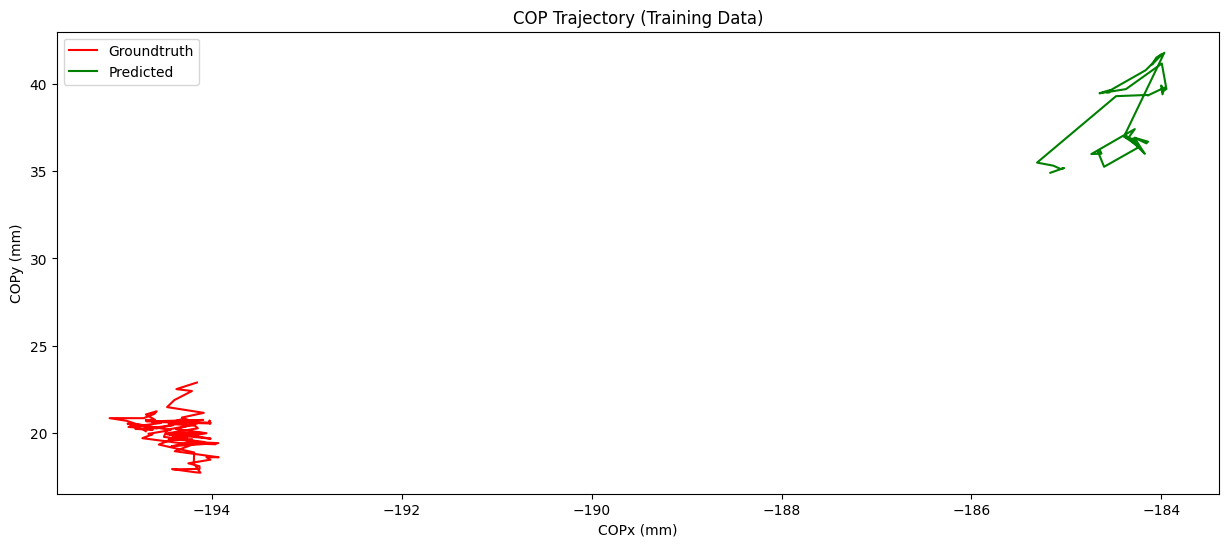

In [25]:
x = range(100)
Test_y1 = Test_FC_COP[0:100,0]
Test_y2 = Test_FC_COP[0:100,1]
Test_y3 = Test_Pred_COP[0:100,0]
Test_y4 = Test_Pred_COP[0:100,1]

pyplot.figure(figsize=(15,6))
pyplot.plot(Test_y1, Test_y2, color='red')
pyplot.plot(Test_y3, Test_y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

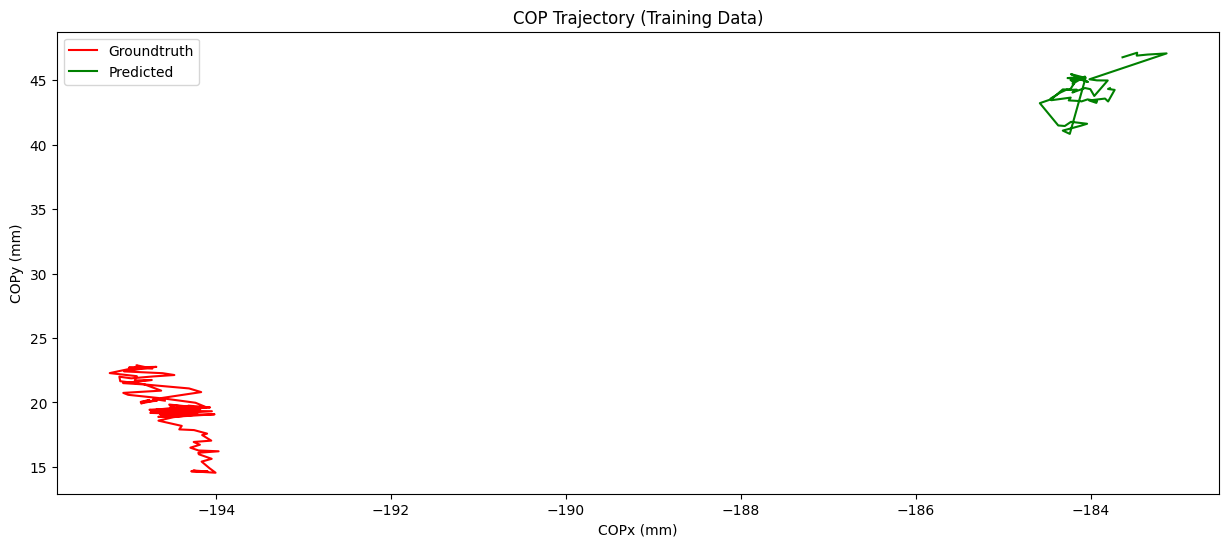

In [26]:
x = range(100)
Test_y1 = Test_FC_COP[100:200,0]
Test_y2 = Test_FC_COP[100:200,1]
Test_y3 = Test_Pred_COP[100:200,0]
Test_y4 = Test_Pred_COP[100:200,1]

pyplot.figure(figsize=(15,6))
pyplot.plot(Test_y1, Test_y2, color='red')
pyplot.plot(Test_y3, Test_y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

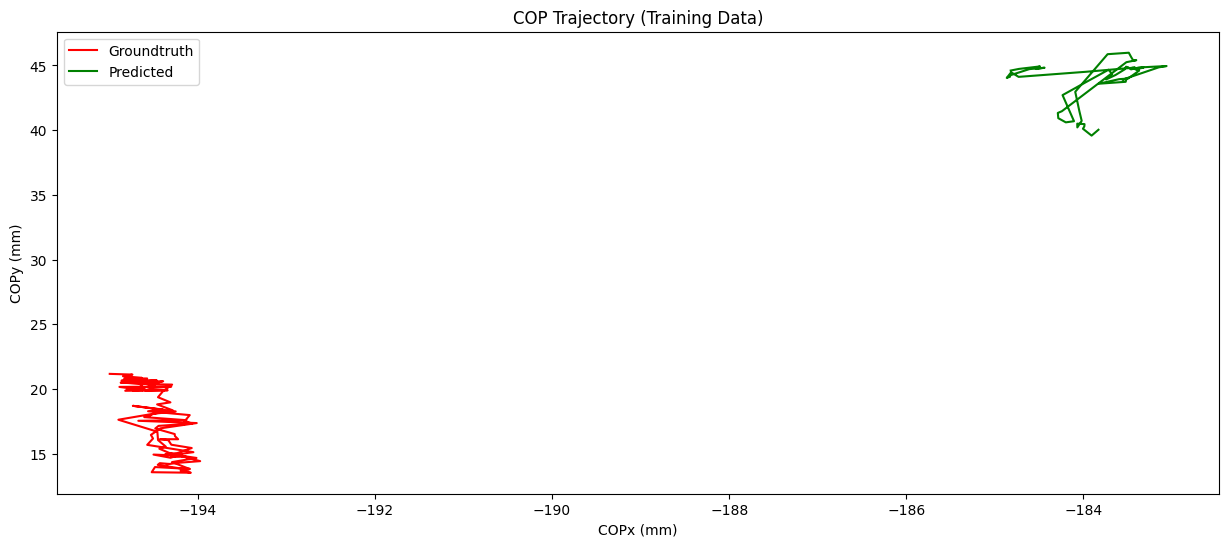

In [27]:
x = range(100)
Test_y1 = Test_FC_COP[200:300,0]
Test_y2 = Test_FC_COP[200:300,1]
Test_y3 = Test_Pred_COP[200:300,0]
Test_y4 = Test_Pred_COP[200:300,1]

pyplot.figure(figsize=(15,6))
pyplot.plot(Test_y1, Test_y2, color='red')
pyplot.plot(Test_y3, Test_y4, color='green')
plt.title('COP Trajectory (Training Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

In [28]:
## Model Validation
Test_Insole = pd.read_csv('0312AryaStand5Min2.txt', header=None, low_memory=False)
TestSIData =  np.asarray(Test_Insole)

Test_df = pd.read_csv('0312AryaStand5Min2.csv', low_memory=False)
Test_columns = ['Fx','Fy','Fz','Mx','My','Mz']
Test_selected_df = Test_df[Test_columns]
Test_FPDatas = Test_selected_df[:6000]


test_SmartInsole = np.array(TestSIData[:6000]).astype('float64')
Test_FPData = np.array(Test_FPDatas).astype('float64')

Test_FXData = Test_FPData[:,0]/10
Test_FXData =  np.array(Test_FXData)
Test_FXData = Test_FXData.reshape(-1,1)
Test_FYData = Test_FPData[:,1]/5
Test_FYData =  np.array(Test_FYData)
Test_FYData = Test_FYData.reshape(-1,1)
Test_FZData = (Test_FPData[:,2])/10
Test_FZData =  np.array(Test_FZData)
Test_FZData = Test_FZData.reshape(-1,1)
Test_MXData = (Test_FPData[:,3])/1000
Test_MXData =  np.array(Test_MXData)
Test_MXData = Test_MXData.reshape(-1,1)
Test_MYData = (Test_FPData[:,4])/10000
Test_MYData =  np.array(Test_MYData)
Test_MYData =Test_MYData.reshape(-1,1)
Test_MZData = (Test_FPData[:,5])/100
Test_MZData =  np.array(Test_MZData)
Test_MZData = Test_MZData.reshape(-1,1)

Test_newFPData = np.concatenate((Test_FXData, Test_FYData, Test_FZData, Test_MXData, Test_MYData, Test_MZData), axis=1)
## End Load Data
Test_newFPData = abs(Test_newFPData)

Test_SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(test_SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
    # coeffs[-2] = np.zeros_like(coeffs[-2])
    # coeffs[-3] = np.zeros_like(coeffs[-3])
    # coeffs[-4] = np.zeros_like(coeffs[-4])
    # coeffs[-5] = np.zeros_like(coeffs[-5])
    # coeffs[-6] = np.zeros_like(coeffs[-6])
    # coeffs[-7] = np.zeros_like(coeffs[-7])
    Test_SIDWTcoeffs.append(coeffs)

Test_SIData_filtered = np.zeros(test_SmartInsole.shape)
for i in range(89):
    Test_SIData_filtered[:, i] = pywt.waverec(Test_SIDWTcoeffs[i], 'db4', mode='symmetric', axis=0)

for i in range(len(Test_SIData_filtered)):
    if i < len(Test_SIData_filtered):
        Test_SIData_filtered[i][0] = 0
        # Test_SIData_filtered[i][0] = Test_SIData_filtered[i][0] + (iter % max_iter) + 1
        iter += 1
    else:
        Test_SIData_filtered[i][0] = 0

# for i in range(len(Test_SIData_filtered)):
#     Test_SIData_filtered[i][0] = i-1
#     iter += 1

for i in range(len(Test_SIData_filtered)):
    Test_SIData_filtered[i][np.abs(Test_SIData_filtered[i]) < 1] = 0

Test_xscale = (Test_SIData_filtered - minInsole) / ( maxInsole - minInsole )

Test_yscale = []
for i in range(0,6):
  Test_scale = (Test_newFPData[:,i] - FPmin[i]) / ( FPmax[i] - FPmin[i] )
  Test_yscale.append(Test_scale)
Test_yscale = np.array(Test_yscale)
Test_yscale = Test_yscale.transpose()

test_sample_size = Test_xscale.shape[0] # number of samples in train set
test_time_steps  = Test_xscale.shape[1] # number of features in train set
test_input_dimension = 1               # each feature is represented by 1 number

test_train_data_reshaped = Test_xscale.reshape(test_sample_size,test_time_steps,test_input_dimension)

Regression_Model.evaluate(test_train_data_reshaped, Test_yscale)
Test_xX_model = Regression_Model.predict(test_train_data_reshaped)

#invert normalize
Test_y_inverse = []
Test_y_pred_inverse = []

for i in range(0,6):
  Test_Y_inver =  Test_yscale[:, i]*( FPmax[i] - FPmin[i] )+FPmin[i]
  Test_Pred_inver = Test_xX_model[:, i]*( FPmax[i] - FPmin[i] )+FPmin[i]
  Test_y_inverse.append(Test_Y_inver)
  Test_y_pred_inverse.append(Test_Pred_inver)
Test_y_inverse = np.array(Test_y_inverse)
Test_y_inverse = Test_y_inverse.transpose()
Test_y_pred_inverse = np.array(Test_y_pred_inverse)
Test_y_pred_inverse = Test_y_pred_inverse.transpose()

for i in range(len(Test_y_pred_inverse)):
    if (np.abs(Test_y_pred_inverse[i]) < 1).all():
        Test_y_pred_inverse[i] = 0

for i in range(0, Test_y_pred_inverse.shape[0], 50):
    zero_rows = np.count_nonzero(Test_y_pred_inverse[i:i+50, :], axis=1) == 0
    non_zero_rows = np.count_nonzero(Test_y_pred_inverse[i:i+50, :], axis=1) > 0
    if np.sum(zero_rows) > np.sum(non_zero_rows):
        Test_y_pred_inverse[i:i+50, :][non_zero_rows] = 0.0

# make to original Data
Test_FXData2 = Test_y_inverse[:,0]*10
Test_FXData2=  np.array(Test_FXData2)
Test_FXData2 = Test_FXData2.reshape(-1,1)

Test_FYData2 = Test_y_inverse[:,1]*10
Test_FYData2 =  np.array(Test_FYData2)
Test_FYData2 = Test_FYData2.reshape(-1,1)

Test_FZData2 = (Test_y_inverse[:,2]*10)
Test_FZData2 =  np.array(Test_FZData2)
Test_FZData2 = Test_FZData2.reshape(-1,1)

Test_MXData2 = (Test_y_inverse[:,3]*1000)
Test_MXData2 =  np.array(Test_MXData2)
Test_MXData2 = Test_MXData2.reshape(-1,1)

Test_MYData2 = (Test_y_inverse[:,4]*10000)
Test_MYData2 =  np.array(Test_MYData2)
Test_MYData2 = Test_MYData2.reshape(-1,1
                          )
Test_MZData2 = (Test_y_inverse[:,5]*100)
Test_MZData2 =  np.array(Test_MZData2)
Test_MZData2 = Test_MZData2.reshape(-1,1)

Test_new_inverse2 = np.concatenate((Test_FXData2, Test_FYData2, Test_FZData2, Test_MXData2, Test_MYData2, Test_MZData2), axis=1)

Test_FXData3 = Test_y_pred_inverse[:,0]*10
Test_FXData3=  np.array(Test_FXData3)
Test_FXData3 = Test_FXData3.reshape(-1,1)

Test_FYData3 = Test_y_pred_inverse[:,1]*10
Test_FYData3 =  np.array(Test_FYData3)
Test_FYData3 = Test_FYData3.reshape(-1,1)

Test_FZData3 = (Test_y_pred_inverse[:,2]*10)
Test_FZData3 =  np.array(Test_FZData3)
Test_FZData3 = Test_FZData3.reshape(-1,1)

Test_MXData3 = (Test_y_pred_inverse[:,3]*1000)
Test_MXData3 =  np.array(Test_MXData3)
Test_MXData3 = Test_MXData3.reshape(-1,1)

Test_MYData3 = (Test_y_pred_inverse[:,4]*10000)
Test_MYData3 =  np.array(Test_MYData3)
Test_MYData3 = Test_MYData3.reshape(-1,1)

Test_MZData3 = (Test_y_pred_inverse[:,5]*100)
Test_MZData3 =  np.array(Test_MZData3)
Test_MZData3 = Test_MZData3.reshape(-1,1)

Test_new_inverse3 = np.concatenate((Test_FXData3, Test_FYData3, Test_FZData3, Test_MXData3, Test_MYData3, Test_MZData3), axis=1)

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000 
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_new_inverse2[0:3000,i],color='red')
    plt.plot(x,Test_new_inverse3[0:3000,i], markerfacecolor='none',color='green')
    plt.title('CNN Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()

# COP
from math import*
np.seterr(divide='ignore', invalid='ignore')

Test_out_Fz = Test_new_inverse2[:,2]
Test_out_Mx = Test_new_inverse2[:,3]
Test_out_My = Test_new_inverse2[:,4]
Test_Pred_Fz = Test_new_inverse3[:,2]
Test_Pred_Mx = Test_new_inverse3[:,3]
Test_Pred_My = Test_new_inverse3[:,4]

Test_Pred_COPx=[]
for i in range(0,len(Test_Pred_Fz)):
  Test_Pred_COPx_temp=-(Test_Pred_My[i])/Test_Pred_Fz[i]
  if Test_Pred_COPx_temp != Test_Pred_COPx_temp:
    Test_Pred_COPx_temp=0
  Test_Pred_COPx.append(Test_Pred_COPx_temp)
  # break

Test_out_COPx=[]
for i in range(0,len(Test_out_Fz)):
  Test_out_COPx_temp=-(Test_out_My[i])/Test_out_Fz[i]
  if Test_out_COPx_temp != Test_out_COPx_temp:
    Test_out_COPx_temp=0
  Test_out_COPx.append(Test_out_COPx_temp)
  # break

Test_Pred_COPy=[]
for i in range(0,len(Test_Pred_Mx)):
  Test_Pred_COPy_temp=Test_Pred_Mx[i]/Test_Pred_Fz[i]
  if Test_Pred_COPy_temp != Test_Pred_COPy_temp:
    Test_Pred_COPy_temp=0
  Test_Pred_COPy.append(Test_Pred_COPy_temp)
  # break

Test_out_COPy=[]
for i in range(0,len(Test_out_Mx)):
  Test_out_COPy_temp=Test_out_Mx[i]/Test_out_Fz[i]
  if Test_out_COPy_temp != Test_out_COPy_temp:
    Test_out_COPy_temp=0
  Test_out_COPy.append(Test_out_COPy_temp)
  # break


Test_out_COPx = np.array(Test_out_COPx)
Test_out_COPx= Test_out_COPx.reshape(-1,1)

Test_out_COPy = np.array(Test_out_COPy)
Test_out_COPy= Test_out_COPy.reshape(-1,1)

Test_Pred_COPx = np.array(Test_Pred_COPx)
Test_Pred_COPx= Test_Pred_COPx.reshape(-1,1)

Test_Pred_COPy = np.array(Test_Pred_COPy)
Test_Pred_COPy= Test_Pred_COPy.reshape(-1,1)

Test_Pred_COP = np.concatenate((Test_Pred_COPx, Test_Pred_COPy), axis=1)
Test_FC_COP = np.concatenate((Test_out_COPx, Test_out_COPy), axis=1)

Test_col_COP = 'COPx', 'COPy'

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,2000)*40/2000 
for i in range(0,2):
    plt.figure(figsize=(15,6))
    plt.plot(x,Test_FC_COP[0:2000,i], color='red')
    plt.plot(x,Test_Pred_COP[0:2000,i],markerfacecolor='none',color='green')
    plt.title('COP Calculation (Testing Data)')
    plt.ylabel(col_COP[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.savefig('Regression Result.png'[i])
    plt.show()

# Trajectory
from matplotlib import pyplot

x = range(50)
Test_y1 = Test_FC_COP[50:100,0]
Test_y2 = Test_FC_COP[50:100,1]
Test_y3 = Test_Pred_COP[50:100,0]
Test_y4 = Test_Pred_COP[50:100,1]

# pyplot.figure(figsize=(15,6))
# pyplot.plot(FC_COP[:,0],FC_COP[:,1])
# pyplot.show()

# Test_data_filter = abs(y1) > 0
# Test_data_filter2 = abs(y3) > 0
pyplot.figure(figsize=(15,6))
# pyplot.plot(Test_y1[Test_data_filter], Test_y2[Test_data_filter ], color='red', alpha=0.3)
# pyplot.plot(Test_y3[Test_data_filter2], Test_y4[Test_data_filter2 ], color='green')
pyplot.plot(Test_y1, Test_y2, color='red')
pyplot.plot(Test_y3, Test_y4, color='green')
plt.title('COP Trajectory (Testing Data)')
pyplot.ylabel('COPy (mm)')
pyplot.xlabel('COPx (mm)')
pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
pyplot.show()

NameError: name 'minInsole' is not defined